In [1]:
library("here")
library(devtools)
library(Seurat)
library(harmony)
library(RcppML)
library(reshape2)
library(tidyverse)
load_all('/home/jpm73279/Socrates')
data_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/"

set.seed(12345)



here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Attaching SeuratObject

Loading required package: Rcpp

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

ℹ Loading Socrates

Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loading required package: Biobase

Loading

In [2]:

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

In [3]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/"
#analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/"
ann <- paste0(reference_genome_path,"Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3")
chr <- paste0(reference_genome_path,"Zm-B73-REFERENCE-NAM-5.0.chrom.size")
bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"


#Load Object
Zm.subcluster <- loadBEDandGenomeData(bed_intersections, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [4]:

marker_list_maize_file <- "/home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/markers/Zm.markers.leaf.txt"
marker_list_maize <- read_delim(marker_list_maize_file, delim='\t', 
                                       col_names = TRUE)

Rows: 188 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): chr, geneID, name, type, tissue
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
loaded_socrates_data <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/Zm_leaf.merged_replicates.updated_annotation_approach.V3.2022-06-23.saved_socrates_output.RDS")

In [6]:
loaded_socrates_data$Clusters  %>% 
        group_by(Louvain_cluster_safe)  %>% 
    summarise(n())
    

Louvain_cluster_safe n() 
1  LouvainC_1           1528
2  LouvainC_10           792
3  LouvainC_11           694
4  LouvainC_12           611
5  LouvainC_13           616
6  LouvainC_14           494
7  LouvainC_15           437
8  LouvainC_16           431
9  LouvainC_17           415
10 LouvainC_18           323
11 LouvainC_19           317
12 LouvainC_2           1495
13 LouvainC_20           220
14 LouvainC_21           132
15 LouvainC_3           1396
16 LouvainC_4           1096
17 LouvainC_5           1033
18 LouvainC_6            995
19 LouvainC_7            991
20 LouvainC_8            911
21 LouvainC_9            866

## SubClustering Epidermal Lineages:
"LouvainC_2", "LouvainC_12", "LouvainC_20", 
"LouvainC_4", "LouvainC_6", "LouvainC_18",
"LouvainC_15", "LouvainC_1"

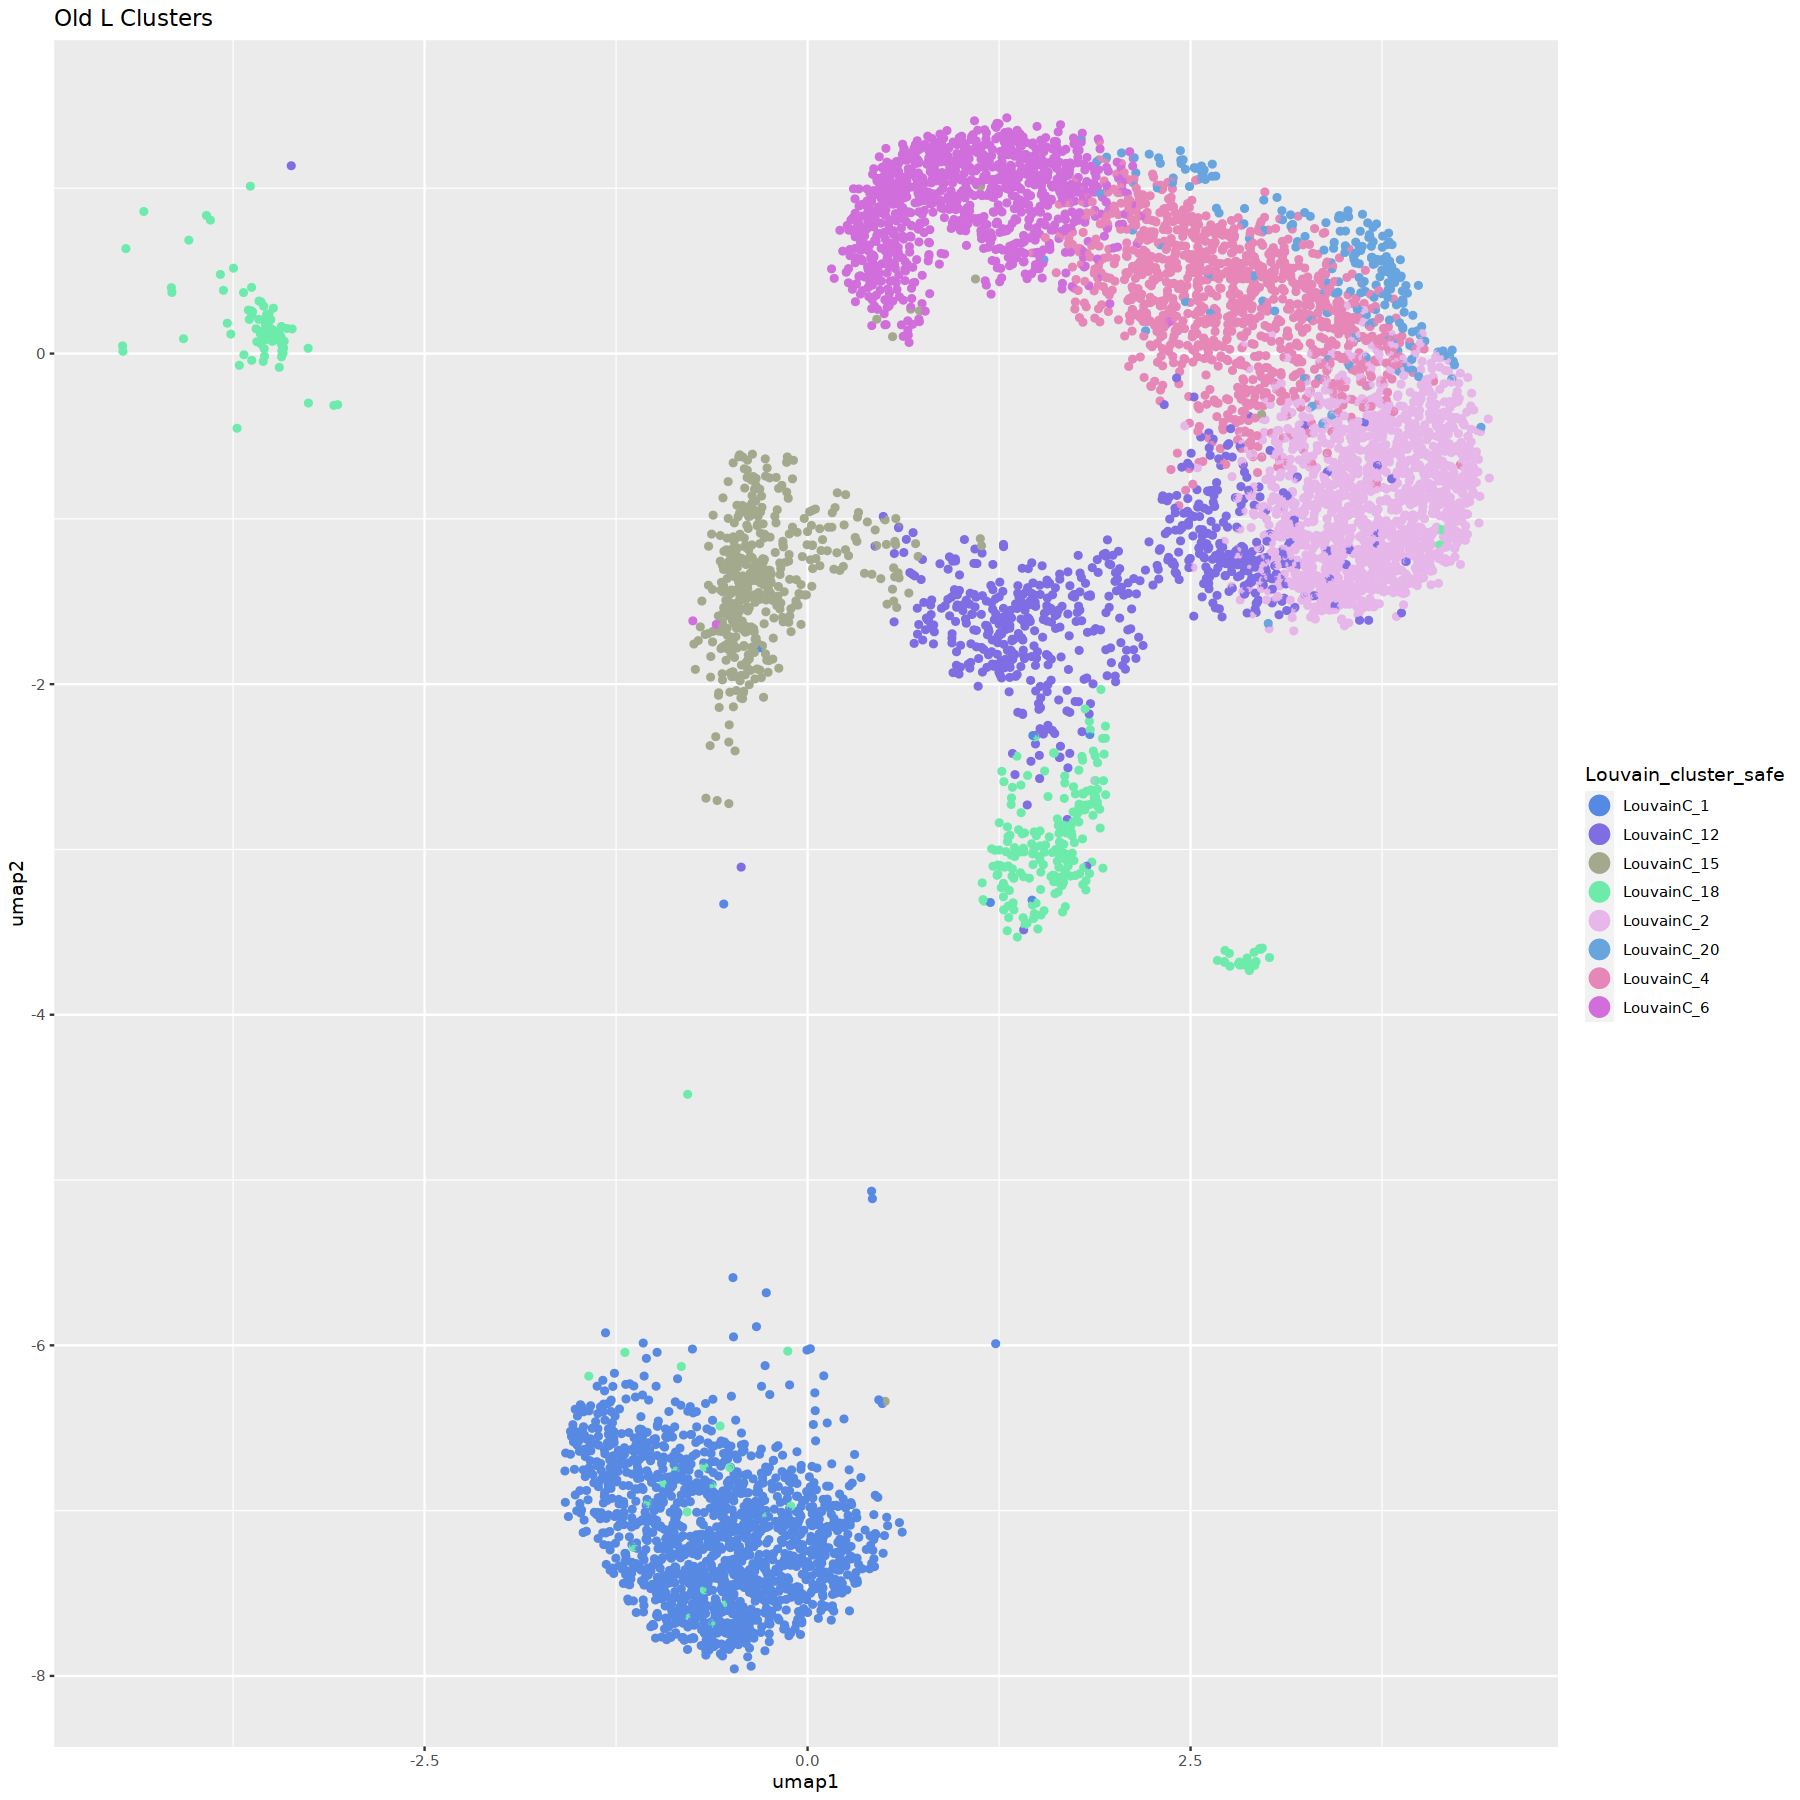

In [5]:
library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in% c("LouvainC_2", "LouvainC_12", "LouvainC_20", 
                                     "LouvainC_4", "LouvainC_6", "LouvainC_18",
                                    "LouvainC_15","LouvainC_1"))  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

chosen_subcluster <- loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in% c("LouvainC_2", "LouvainC_12", "LouvainC_20", 
                                     "LouvainC_4", "LouvainC_6", "LouvainC_18",
                                    "LouvainC_15", "LouvainC_1"))  

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Zm.subcluster$meta <- meta_df
Zm.subcluster$meta.v3 <- meta_df

In [6]:
Zm.subcluster$acr <- read.table("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/LouvainClustering_bws/Zm.LouvainCluster.V3.500bp_peaks.fixed.bed")

In [7]:
Zm.subcluster.matrix_counts <- generateMatrix(Zm.subcluster, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                              verbose=TRUE)

In [8]:
Zm.subcluster.sparse <- convertSparseData(Zm.subcluster.matrix_counts, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [9]:
# clean sparse counts matrix ---------------------------------------------
Zm.subcluster.matrix_counts.clean <- cleanData(Zm.subcluster.sparse, 
                     min.t=0.005,  # minimum feature frequency across cells
                     max.t=0.1, # maximum feature frequency across cells
                     verbose=T)


   * Input: cells = 6705 | peaks = 94819

   * Filtered: cells = 6655 | peaks = 40325



In [10]:
Zm.subcluster.sparse$meta  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    summarise(n())
    

Louvain_cluster_safe n() 
1 LouvainC_1           1528
2 LouvainC_12           611
3 LouvainC_15           437
4 LouvainC_18           323
5 LouvainC_2           1495
6 LouvainC_20           220
7 LouvainC_4           1096
8 LouvainC_6            995

In [11]:
# normalize with TFIDF ---------------------------------------------------
Zm.subcluster.tfidf <- tfidf(Zm.subcluster.matrix_counts.clean)

In [12]:
# project with NMF -------------------------------------------------------
Zm.subcluster.reduce_dim <- reduceDims(Zm.subcluster.tfidf,
                      method="SVD", 
                      n.pcs=30, 
                      num.var=50000,
                      svd_slotName="SVD")

In [13]:
str(Zm.subcluster.reduce_dim)

List of 8
 $ counts     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:5255872] 3 4 5 7 9 13 17 18 20 22 ...
  .. ..@ p       : int [1:6656] 0 8707 14545 22561 29192 36207 42562 49183 53159 59129 ...
  .. ..@ Dim     : int [1:2] 40325 6655
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:40325] "chr1_100175906_100176407" "chr1_100182237_100182738" "chr1_100184921_100185422" "chr1_1002464_1002965" ...
  .. .. ..$ : chr [1:6655] "BC:Z:GTGGCCTAGCTTAGCGAATTCCTACTAA-Zm_rep1_P5_10x.rep1" "BC:Z:GTGAAAAGTCAAAAACAGTAGAGACTAA-Zm_rep1_P4_10x.rep1" "BC:Z:GTGGCCTAGCTTAGCGAGTAGAGCGAGG-Zm_rep1_P5_10x.rep1" "BC:Z:GTGAAACTTGTAAGCGAGTCCGCCGAGG-Zm_rep1_P4_10x.rep1" ...
  .. ..@ x       : num [1:5255872] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ meta       :'data.frame':	6655 obs. of  14 variables:
  ..$ cellID              : chr [1:6655] "BC:Z:GTGGCCTAGCTTAGCGAATTCCTACTAA-Zm_rep1_P5_10x.rep1" "BC:Z:GTGAAAAGTCAAAAACAGTAGAGACTAA-Zm_rep1_P4_10x.rep1" "BC:Z:GTG

 - non-linear dimensionality reduction with UMAP ...

14:40:52 UMAP embedding parameters a = 1.577 b = 0.8951

14:40:52 Read 6655 rows and found 29 numeric columns

14:40:52 Using Annoy for neighbor search, n_neighbors = 30

14:40:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:40:54 Writing NN index file to temp file /tmp/RtmpMNVUsM/filee1c86a5b7324

14:40:54 Searching Annoy index using 24 threads, search_k = 3000

14:40:54 Annoy recall = 100%

14:41:06 Commencing smooth kNN distance calibration using 24 threads

14:41:15 Initializing from normalized Laplacian + noise

14:41:15 Commencing optimization for 500 epochs, with 278788 positive edges

14:42:01 Optimization finished



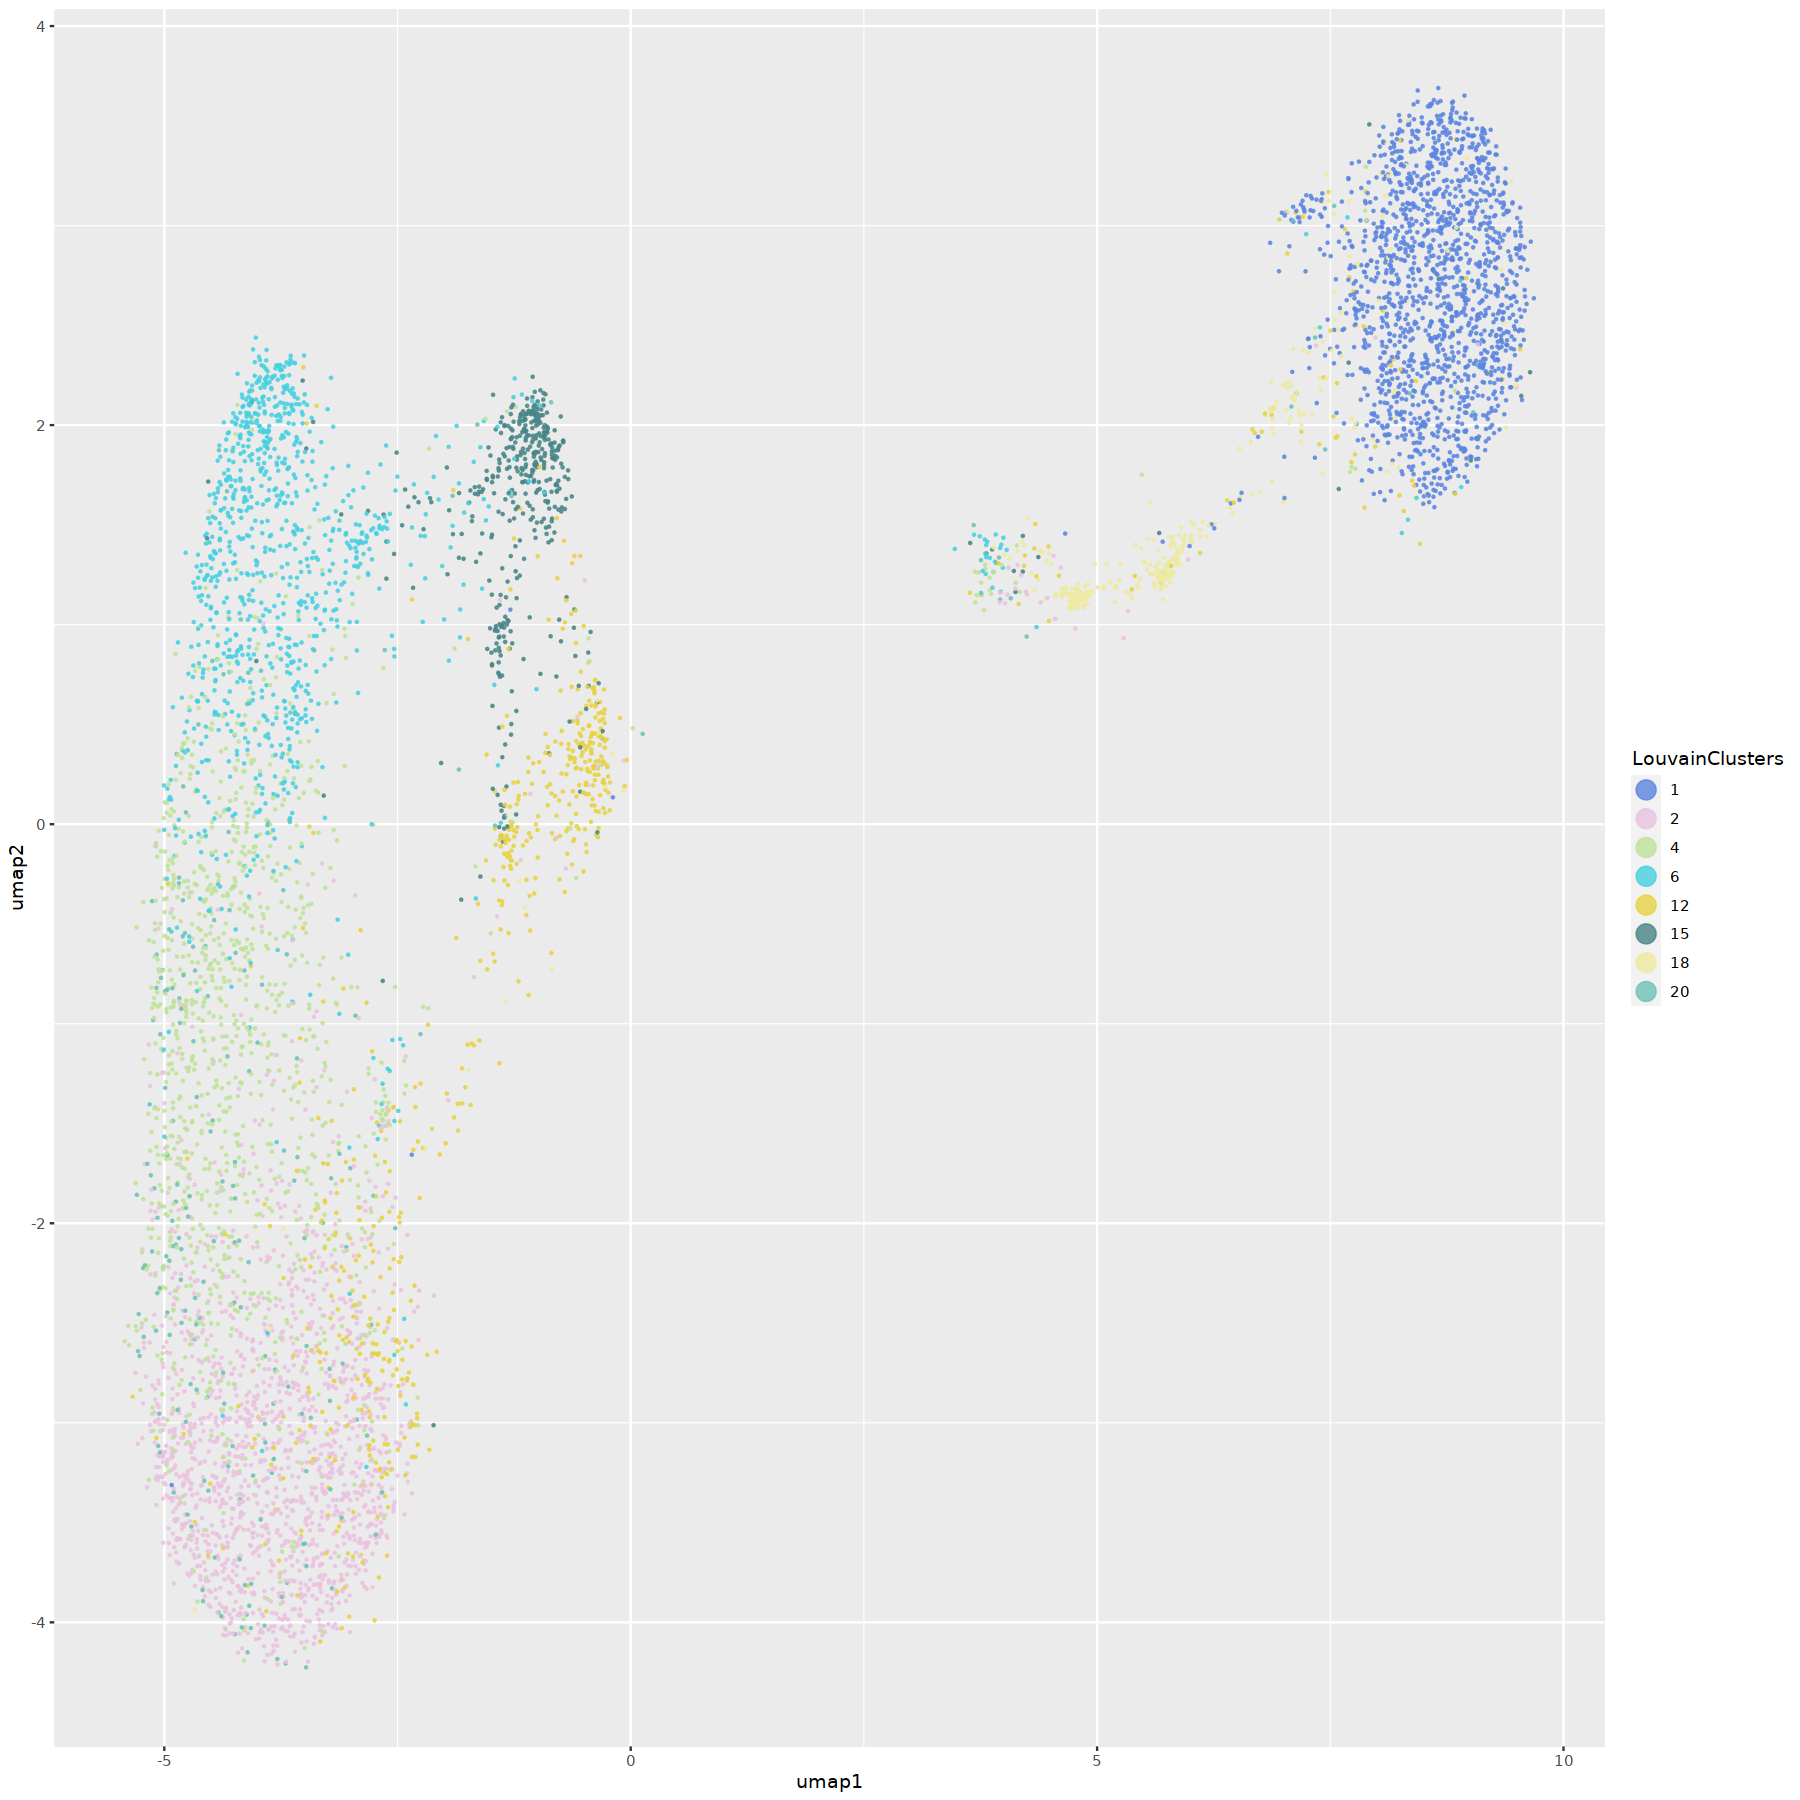

In [14]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Zm.subcluster.tfidf <- projectUMAP(Zm.subcluster.reduce_dim, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(Zm.subcluster.tfidf$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [15]:
# identify clusters using neighborhood graph -----------------------------
tfidf.obj.dob.filt.clusters <- callClusters(Zm.subcluster.tfidf, 
                        res=1.6,
                        k.near = 30,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6525
Number of edges: 263978

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.6764
Number of communities: 12
Elapsed time: 14 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



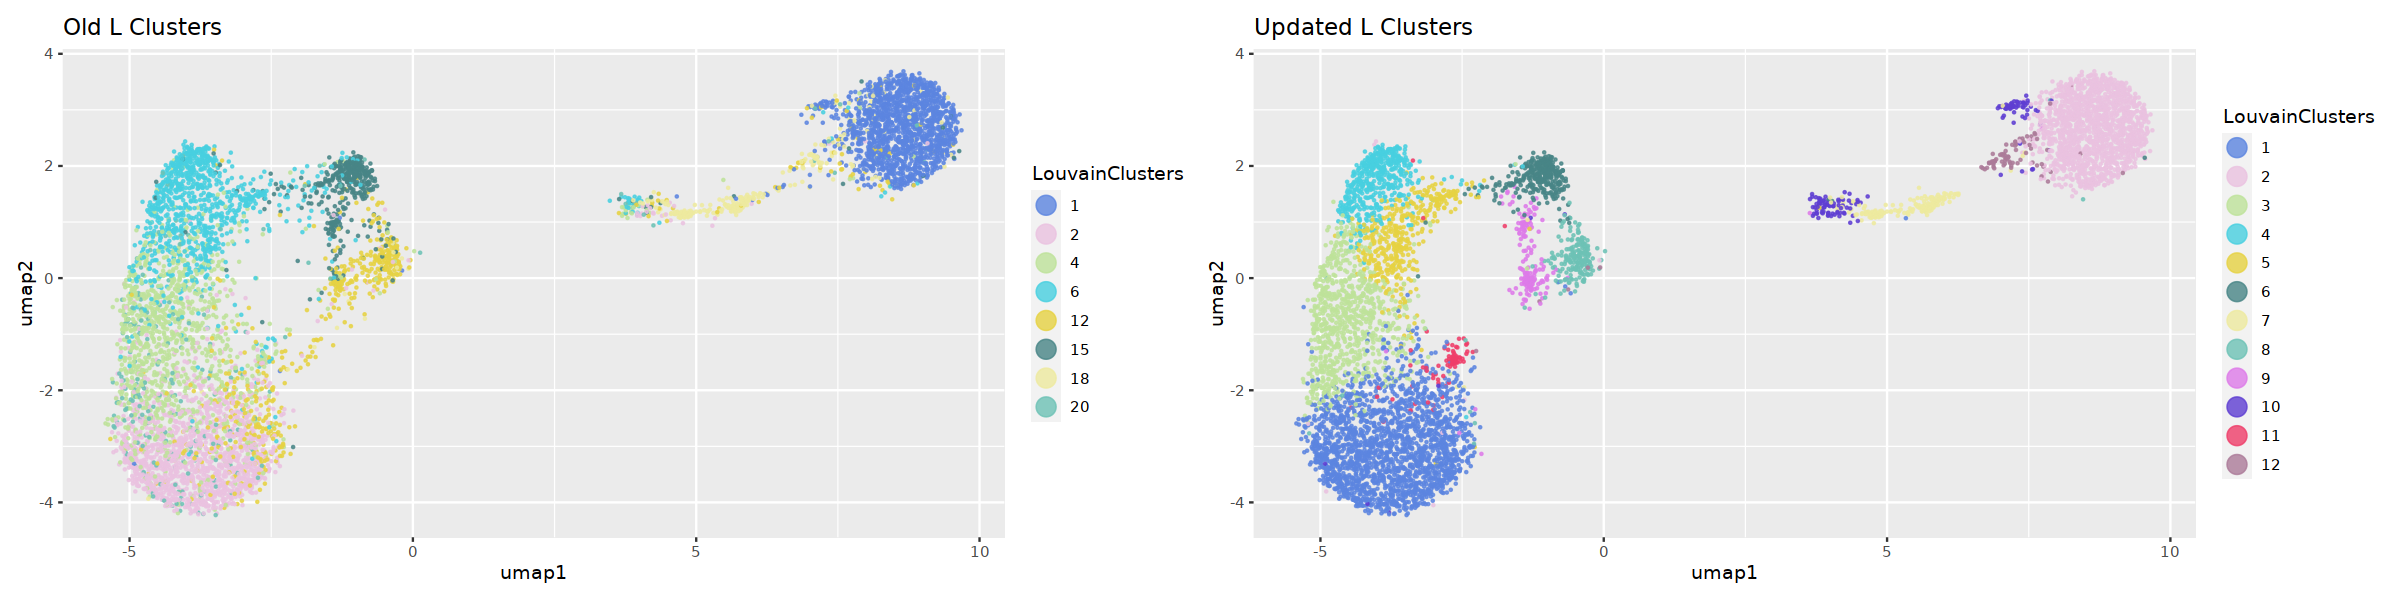

In [16]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(tfidf.obj.dob.filt.clusters$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(tfidf.obj.dob.filt.clusters$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [17]:
tfidf.obj.dob.filt.clusters$sub_cluster  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(n())

LouvainClusters n() 
1  1               1982
2  2               1553
3  3                840
4  4                502
5  5                413
6  6                334
7  7                220
8  8                219
9  9                166
10 10               137
11 11                80
12 12                79

In [6]:
run_presto <- function(meta_obj, 
                       meta_slot = "Clusters", 
                       cluster_name = "LouvainClusters", 
                       counts_raw="acr_counts_raw"){
    ### Pull the correct meta datafrom the Socrates Object
    sparse_matrix <- meta_obj[[counts_raw]]
    meta_data <- meta_obj[[meta_slot]]
    
    print(head(as_tibble(meta_data)))
        
    ### Read the Giant Sparse Matrix
    loaded_sparse_matric <- read_delim(sparse_matrix, delim='\t', 
                                       col_names = c("gene_name", "barcode", "accessability"), 
                                       col_types = "ccn")
    
    print(head(loaded_sparse_matric))
    combined_large_w_sparse <- loaded_sparse_matric  %>% 
        filter(gene_name != "Annotation")  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        left_join(., meta_data, by = c("barcode" = "cellID"))  %>% 
        filter(is.na(!!sym(cluster_name)) != TRUE)  %>% 
        arrange(!!sym(cluster_name))
    
    #order <- combined_large_w_sparse[!!sym(cluster_name)]

    combined_large_w_sparse <- combined_large_w_sparse  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        mutate(across(accessability, as.numeric))
    
    
    gene_names <- unique(combined_large_w_sparse$gene_name)
    barcodes <- unique(combined_large_w_sparse$barcode)

    combined_large_w_sparse$row <- match(combined_large_w_sparse$gene_name, gene_names)
    combined_large_w_sparse$col <- match(combined_large_w_sparse$barcode, barcodes)


    UIMatrix <- sparseMatrix(i = combined_large_w_sparse$row,
                         j = combined_large_w_sparse$col,
                         x = combined_large_w_sparse$accessability,
                         dimnames=list(gene_names, barcodes))

    print(head(tibble(barcode = unlist(UIMatrix@Dimnames[2]))))
    barcode_tibble <- tibble(barcode = unlist(UIMatrix@Dimnames[2])) %>% 
        left_join(., as_tibble(meta_data), by = c("barcode" = "cellID"))  %>% 
        filter(is.na(total) != TRUE)
    
    print(dim(barcode_tibble))
    print(dim(UIMatrix))
    
    clust_name <- c(cluster_name)
    garbbed_louv_order <- pull(barcode_tibble,!!sym(clust_name))

    sparse_matrix_test <- wilcoxauc(UIMatrix, garbbed_louv_order)
    
    meta_obj[["presto_marker"]] <- sparse_matrix_test
    
    return(meta_obj)
}


In [19]:
setwd("/scratch/jpm73279/comparative_single_cell/dev_location")
tfidf.obj.dob.filt.clusters$all_genes <- "/home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM_Zm00001eb.1.genes.bed"
bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"
genome_file <- "/home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0.fa.fai"

In [20]:

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
tfidf.obj.dob.filt.clusters.counts <- tfidf.obj.dob.filt.clusters
tfidf.obj.dob.filt.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/Zm.gene_counts.output"

In [21]:
## Execute Annotation Attempt #1

library(presto)
tfidf.obj.dob.filt.clusters.counts.final <- run_presto(tfidf.obj.dob.filt.clusters.counts,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

Loading required package: data.table


Attaching package: 'data.table'


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:reshape2':

    dcast, melt




# A tibble: 6 × 14
  cellID        total   tss  acrs  ptmt nSites log10nSites sampleID  umap1 umap2
  <chr>         <dbl> <dbl> <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl> <dbl>
1 BC:Z:GTGGCCT… 79068 27529 40483    NA  13216        4.12 rep1      7.18  3.11 
2 BC:Z:GTGAAAA… 47683 15045 24942    NA   9019        3.96 rep1     -0.404 0.406
3 BC:Z:GTGGCCT… 43371 21084 35438    NA  11561        4.06 rep1     -1.41  0.867
4 BC:Z:GTGAAAC… 40662 17552 28470    NA   9846        3.99 rep1      3.85  1.17 
5 BC:Z:GTCCGCA… 39209 17750 29628    NA  10210        4.01 rep1     -1.35  2.00 
6 BC:Z:GTGAAAG… 38891 16781 27213    NA   9477        3.98 rep1     -0.451 0.931
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name       barcode                                          accessability
  <chr>           <chr>                                                    <dbl>
1 Zm00001eb024370 BC:Z:AGTCAACTTGTAAGC

In [22]:
grabbed_top_marker_per_cluster <- top_markers(tfidf.obj.dob.filt.clusters.counts.final$presto_marker, 200)


Rows: 188 Columns: 7
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): chr, geneID, name, type, tissue
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
represented_marker_lst <- list()
for (i in unique(tfidf.obj.dob.filt.clusters.counts.final$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_maize, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


$`10`
# A tibble: 3 × 8
   rank geneID          chr       start       end name  type              tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>             <chr> 
1     4 Zm00001eb121470 chr3    7184482   7190135 me3   bundle_sheath     axill…
2    10 Zm00001eb041120 chr1  216343268 216349212 ccr1  vascular_scleren… axill…
3    17 Zm00001eb033390 chr1  185941269 185953288 dct2  bundle_sheath     axill…

$`8`
# A tibble: 2 × 8
   rank geneID          chr       start       end name  type              tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>             <chr> 
1    31 Zm00001eb359190 chr8  150377960 150388567 cah6  mesophyll         axill…
2    93 Zm00001eb050660 chr1  257907538 257913218 phb   xylem_parenchyma… axill…

$`9`
# A tibble: 8 × 8
   rank geneID          chr       start       end name            type    tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>           <chr>   <chr> 
1     8 Zm00001eb084940 chr2   66223855  66236990 ba2             axilla… axill…
2    46 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1          metaph… axill…
3    55 Zm00001eb393080 chr9  128931828 128934057 bk1_v4v5count_2 vascul… axill…
4    56 Zm00001eb393070 chr9  128931645 128933956 bk1_v4v5count_1 vascul… axill…
5    63 Zm00001eb041120 chr1  216343268 216349212 ccr1            vascul… axill…
6    70 Zm00001eb230300 chr5   72870500  72874432 rop9            subsid… axill…
7   127 Zm00001eb001460 chr1    4293004   4304802 nac78           metaph… axill…
8   182 Zm00001eb233720 chr5   91220184  91225235 bm5             vascul… axill…

$`6`
# A tibble: 2 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     1 Zm00001eb084940 chr2   66223855  66236990 ba2              axill… axill…
2   147 Zm00001eb133930 chr3  105501727 105507931 sut2_v4v5count_2 compa… axill…

$`3`
# A tibble: 5 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     6 Zm00001eb313510 chr7  123684235 123693464 gl1              epide… axill…
2    58 Zm00001eb336530 chr8   17391163  17395311 vt2              epide… axill…
3   106 Zm00001eb084940 chr2   66223855  66236990 ba2              axill… axill…
4   134 Zm00001eb344960 chr8   77541178  77544363 fama_v4v5count_2 guard… axill…
5   191 Zm00001eb344950 chr8   77536955  77542082 fama_v4v5count_1 guard… axill…

$`2`
# A tibble: 3 × 8
   rank geneID          chr       start       end name  type            tissue  
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>           <chr>   
1     3 Zm00001eb158810 chr3  220987633 220994980 cah1  mesophyll       axillar…
2     5 Zm00001eb383680 chr9   70927063  70932470 pepc1 mesophyll       axillar…
3   133 Zm00001eb296990 chr6  178052132 178057800 agp2  pith_parenchyma axillar…

$`5`
# A tibble: 6 × 8
   rank geneID          chr       start       end name            type    tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>           <chr>   <chr> 
1     4 Zm00001eb313510 chr7  123684235 123693464 gl1             epider… axill…
2    18 Zm00001eb084940 chr2   66223855  66236990 ba2             axilla… axill…
3   129 Zm00001eb429330 chr10 141187279 141196584 ZmGL3           tricho… axill…
4   173 Zm00001eb393070 chr9  128931645 128933956 bk1_v4v5count_1 vascul… axill…
5   174 Zm00001eb393080 chr9  128931828 128934057 bk1_v4v5count_2 vascul… axill…
6   184 Zm00001eb126140 chr3   27678358  27686014 ocl1            protod… axill…

$`4`
# A tibble: 2 × 8
   rank geneID          chr       start       end name  type      tissue        
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>     <chr>         
1     2 Zm00001eb313510 chr7  123684235 123693464 gl1   epidermis axillaryBud;l…
2   133 Zm00001eb378150 chr9   25170886  25178773 nst1  xylem     axillaryBud;l…



In [25]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Zm_leaf.merged_replicates.Subclustering_epidermal.LouvainCluster_annot_V3.presto.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster rank geneID          chr   start     end      
1  1               35  Zm00001eb313510 chr7  123684235 123693464
2  1               50  Zm00001eb171720 chr4   30910426  30916600
3  1              165  Zm00001eb050790 chr1  258566321 258579264
4  10               4  Zm00001eb121470 chr3    7184482   7190135
5  10              10  Zm00001eb041120 chr1  216343268 216349212
6  10              17  Zm00001eb033390 chr1  185941269 185953288
7  11               4  Zm00001eb158420 chr3  219956816 219962712
8  11              15  Zm00001eb288410 chr6  159025680 159028453
9  11             144  Zm00001eb117620 chr2  241208198 241210052
10 12              13  Zm00001eb158810 chr3  220987633 220994980
11 2                3  Zm00001eb158810 chr3  220987633 220994980
12 2                5  Zm00001eb383680 chr9   70927063  70932470
13 2              133  Zm00001eb296990 chr6  178052132 178057800
14 3                6  Zm00001eb313510 chr7  123684235 123693464
15 3               58  Zm00001eb336530 chr8   17391163  17395311
16 3              106  Zm00001eb084940 chr2   66223855  66236990
17 3              134  Zm00001eb344960 chr8   77541178  77544363
18 3              191  Zm00001eb344950 chr8   77536955  77542082
19 4                2  Zm00001eb313510 chr7  123684235 123693464
20 4              133  Zm00001eb378150 chr9   25170886  25178773
21 5                4  Zm00001eb313510 chr7  123684235 123693464
22 5               18  Zm00001eb084940 chr2   66223855  66236990
23 5              129  Zm00001eb429330 chr10 141187279 141196584
24 5              173  Zm00001eb393070 chr9  128931645 128933956
25 5              174  Zm00001eb393080 chr9  128931828 128934057
26 5              184  Zm00001eb126140 chr3   27678358  27686014
27 6                1  Zm00001eb084940 chr2   66223855  66236990
28 6              147  Zm00001eb133930 chr3  105501727 105507931
29 8               31  Zm00001eb359190 chr8  150377960 150388567
30 8               93  Zm00001eb050660 chr1  257907538 257913218
31 9                8  Zm00001eb084940 chr2   66223855  66236990
32 9               46  Zm00001eb223190 chr5   36008903  36017433
33 9               55  Zm00001eb393080 chr9  128931828 128934057
34 9               56  Zm00001eb393070 chr9  128931645 128933956
35 9               63  Zm00001eb041120 chr1  216343268 216349212
36 9               70  Zm00001eb230300 chr5   72870500  72874432
37 9              127  Zm00001eb001460 chr1    4293004   4304802
38 9              182  Zm00001eb233720 chr5   91220184  91225235
   name            
1  gl1             
2  ocl5            
3  bhlh43          
4  me3             
5  ccr1            
6  dct2            
7  kch1            
8  sweet1b         
9  pan2_v4v5count_2
10 cah1            
11 cah1            
12 pepc1           
13 agp2            
14 gl1             
15 vt2             
16 ba2             
17 fama_v4v5count_2
18 fama_v4v5count_1
19 gl1             
20 nst1            
21 gl1             
22 ba2             
23 ZmGL3           
24 bk1_v4v5count_1 
25 bk1_v4v5count_2 
26 ocl1            
27 ba2             
28 sut2_v4v5count_2
29 cah6            
30 phb             
31 ba2             
32 ZmNEN1          
33 bk1_v4v5count_2 
34 bk1_v4v5count_1 
35 ccr1            
36 rop9            
37 nac78           
38 bm5             
   type                                                                                                                                                                                                                                                                                                               
1  epidermis                                                                                                                                                                                                                                                                                                          
2  protoderm,L1_SAM,L1_leaf_primordia,L1_inflorescence_meristem,L1

In [193]:
represented_marker_lst

$`4`
# A tibble: 4 × 8
   rank geneID          chr       start       end name  type            tissue  
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>           <chr>   
1     3 Zm00001eb158810 chr3  220987633 220994980 cah1  mesophyll       axillar…
2     5 Zm00001eb383680 chr9   70927063  70932470 pepc1 mesophyll       axillar…
3    87 Zm00001eb359190 chr8  150377960 150388567 cah6  mesophyll       axillar…
4   184 Zm00001eb296990 chr6  178052132 178057800 agp2  pith_parenchyma axillar…

$`7`
# A tibble: 1 × 8
   rank geneID          chr      start      end name  type                tissue
  <int> <chr>           <chr>    <dbl>    <dbl> <chr> <chr>               <chr> 
1     1 Zm00001eb084940 chr2  66223855 66236990 ba2   axillary_meristem,… axill…

$`3`
# A tibble: 6 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     3 Zm00001eb313510 chr7  123684235 123693464 gl1              epide… axill…
2    36 Zm00001eb084940 chr2   66223855  66236990 ba2              axill… axill…
3   120 Zm00001eb344960 chr8   77541178  77544363 fama_v4v5count_2 guard… axill…
4   171 Zm00001eb233720 chr5   91220184  91225235 bm5              vascu… axill…
5   179 Zm00001eb344950 chr8   77536955  77542082 fama_v4v5count_1 guard… axill…
6   194 Zm00001eb319090 chr7  147881484 147888019 ocl3             L1_le… axill…

$`2`
# A tibble: 3 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1    29 Zm00001eb313510 chr7  123684235 123693464 gl1    epidermis        axill…
2   111 Zm00001eb171720 chr4   30910426  30916600 ocl5   protoderm,L1_SA… axill…
3   154 Zm00001eb050790 chr1  258566321 258579264 bhlh43 bundle_sheath    axill…

$`5`
# A tibble: 5 × 8
   rank geneID          chr       start       end name  type            tissue  
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>           <chr>   
1     8 Zm00001eb383680 chr9   70927063  70932470 pepc1 mesophyll       axillar…
2     9 Zm00001eb158810 chr3  220987633 220994980 cah1  mesophyll       axillar…
3   117 Zm00001eb092540 chr2  147040782 147041974 ssu2  bundle_sheath   axillar…
4   156 Zm00001eb197410 chr4  196177320 196178190 ssu1  bundle_sheath   axillar…
5   161 Zm00001eb296990 chr6  178052132 178057800 agp2  pith_parenchyma axillar…

$`6`
# A tibble: 3 × 8
   rank geneID          chr       start       end name  type              tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>             <chr> 
1     4 Zm00001eb313510 chr7  123684235 123693464 gl1   epidermis         axill…
2   132 Zm00001eb084940 chr2   66223855  66236990 ba2   axillary_meriste… axill…
3   164 Zm00001eb378150 chr9   25170886  25178773 nst1  xylem             axill…

$`8`
# A tibble: 3 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1    24 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1 metaphloem_siev… axill…
2    65 Zm00001eb050660 chr1  257907538 257913218 phb    xylem_parenchym… axill…
3    78 Zm00001eb233720 chr5   91220184  91225235 bm5    vascular_sclere… axill…

$`1`
# A tibble: 2 × 8
   rank geneID          chr       start       end name  type              tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>             <chr> 
1    98 Zm00001eb313510 chr7  123684235 123693464 gl1   epidermis         axill…
2   108 Zm00001eb171720 chr4   30910426  30916600 ocl5  protoderm,L1_SAM… axill…

$`9`
# A tibble: 1 × 8
   rank geneID          chr       start       end name  type          tissue    
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>         <chr>     
1    62 Zm00001eb197410 chr4  196177320 196178190 ssu1  bundle_sheath axillaryB…

$`11`
# A tibble: 4 × 8
   rank geneID          chr       

## Write the output for marker visualization

In [29]:

prefix <- "Zm_leaf.merged_replicates.Subclustering_epidermal"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/"
paste0(data_path, prefix,".merged_clusters.sparse")
# output text files
nmf.meta <- tfidf.obj.dob.filt.clusters.counts.final$sub_cluster
nmf.rd <- tfidf.obj.dob.filt.clusters.counts.final$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(tfidf.obj.dob.filt.clusters.counts.final$counts))
trip$i <- rownames(tfidf.obj.dob.filt.clusters.counts.final$counts)[trip$i]
trip$j <- colnames(tfidf.obj.dob.filt.clusters.counts.final$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")



[1] "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/Zm_leaf.merged_replicates.Subclustering_epidermal.merged_clusters.sparse"

In [30]:
saveRDS(tfidf.obj.dob.filt.clusters.counts.final, file = paste0(output_location, prefix, ".rds"))

## SubClustering Mesophyll Lineages



In [5]:
Zm.subcluster.vaculature <- Zm.subcluster

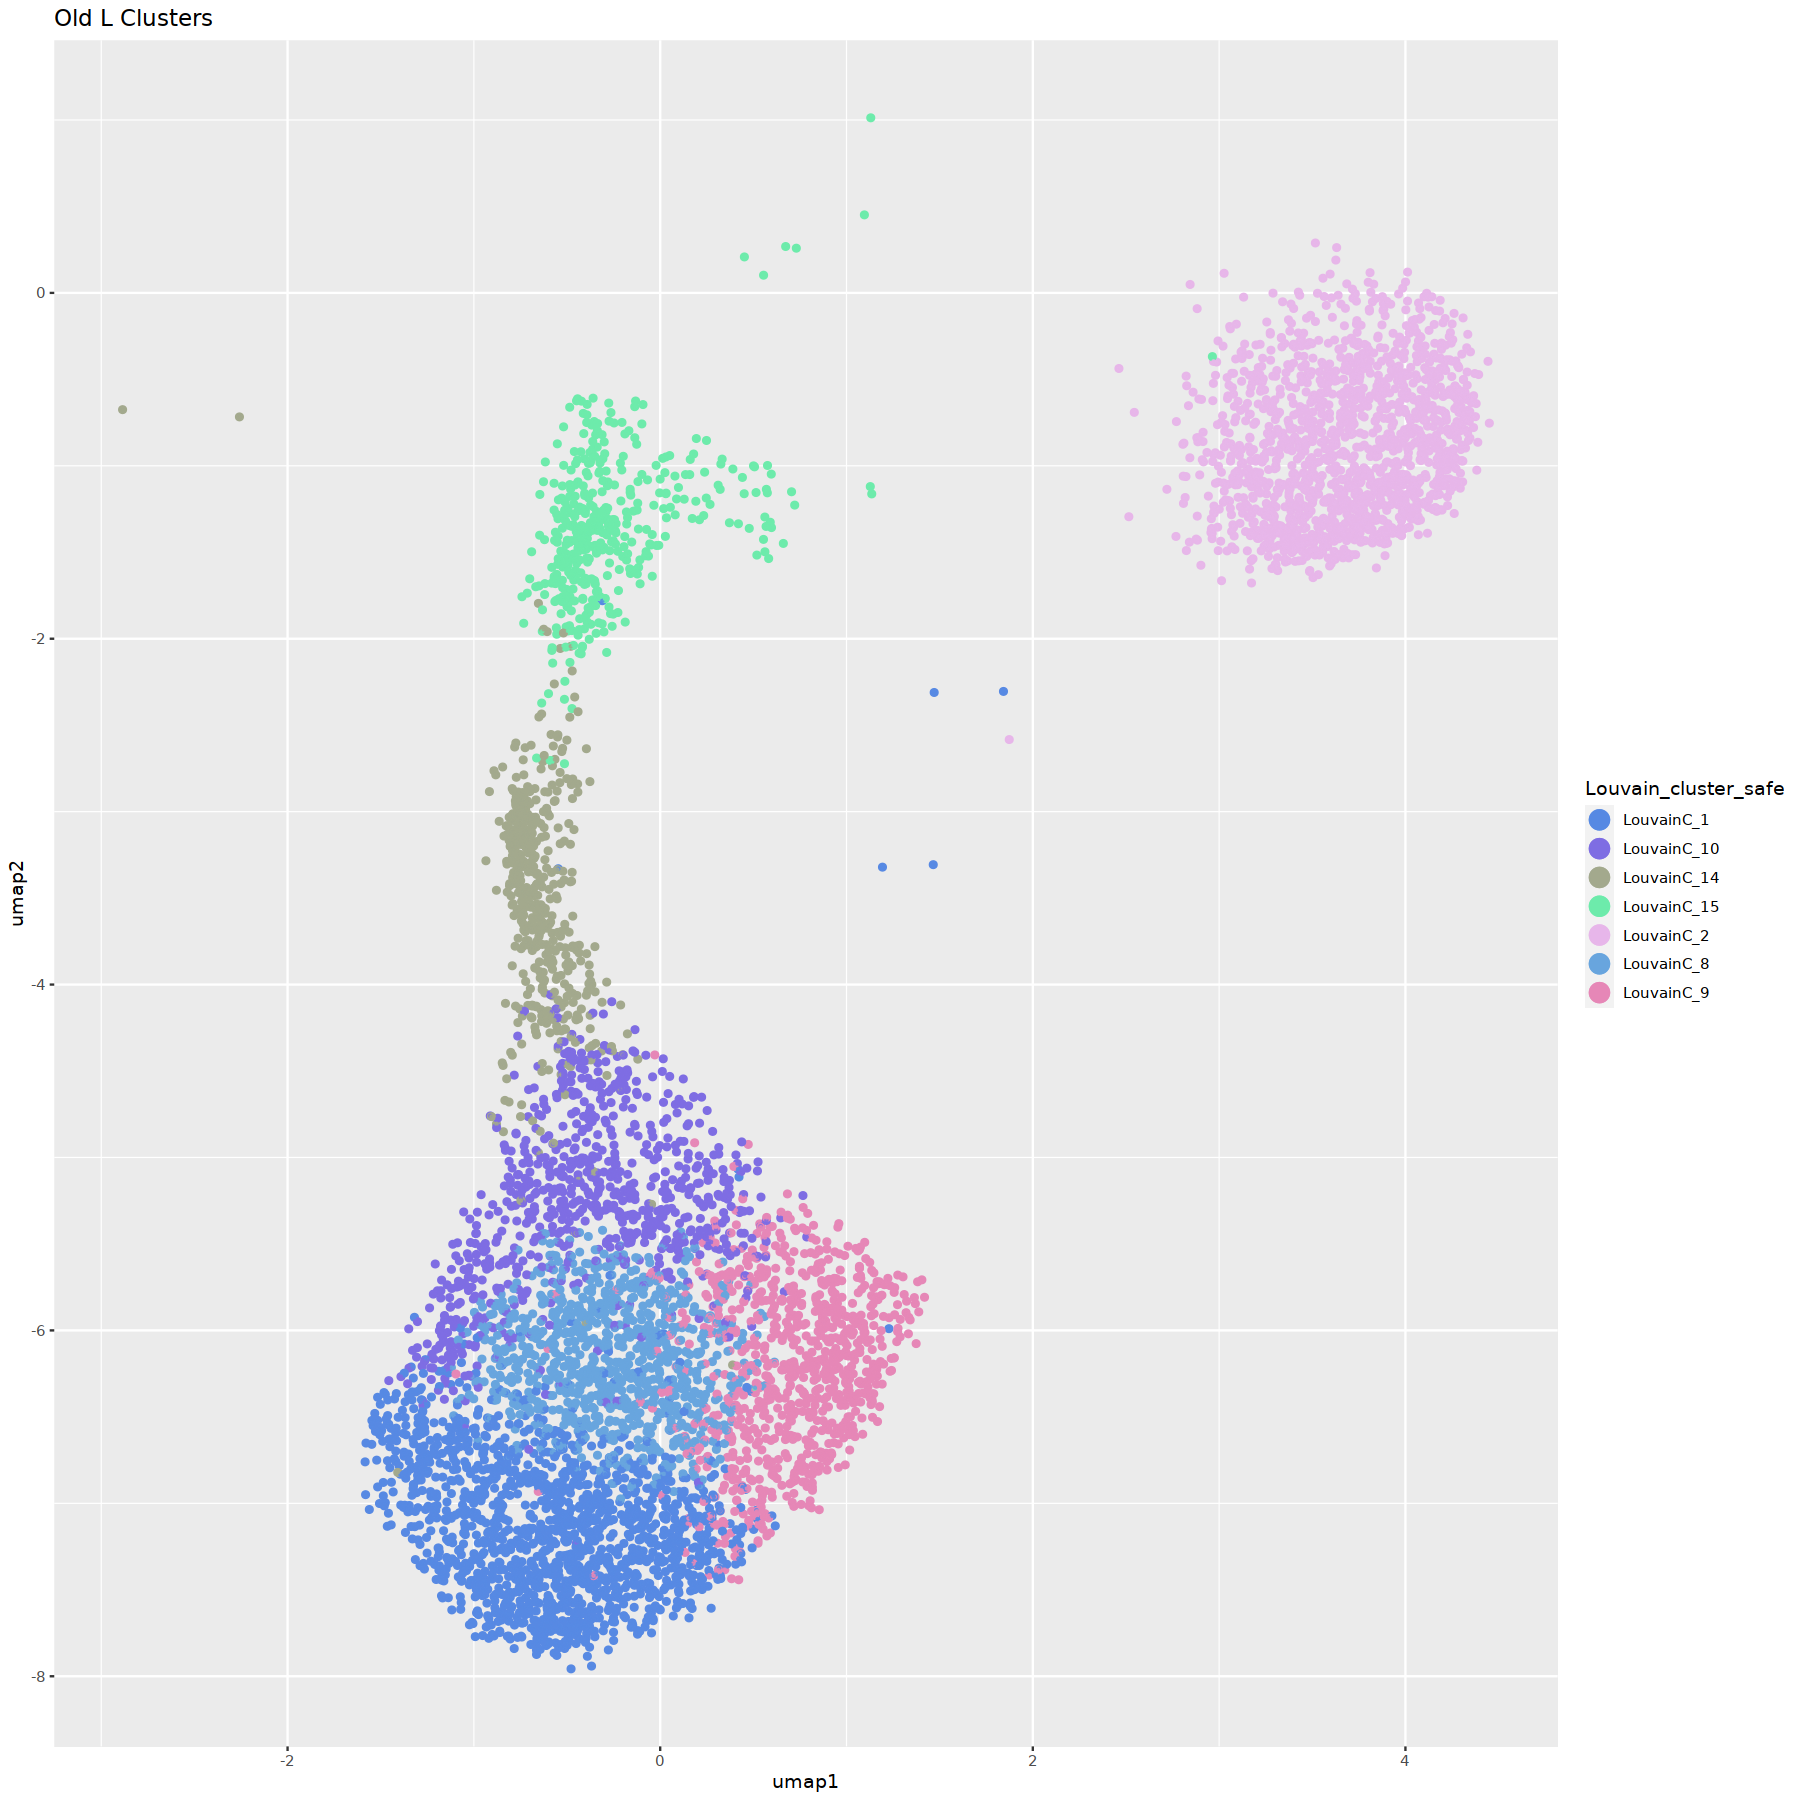

In [8]:
options(repr.plot.width=15, repr.plot.height=15)
loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in% c("LouvainC_14", "LouvainC_2","LouvainC_10", "LouvainC_9", 
                                     "LouvainC_1", "LouvainC_8", "LouvainC_15"))  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

vascular_lineages <- loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in%  c("LouvainC_14", "LouvainC_2","LouvainC_10", "LouvainC_9", 
                                     "LouvainC_1", "LouvainC_8", "LouvainC_15"))  

meta_df <- as.data.frame(vascular_lineages)
rownames(meta_df) <- meta_df$cellID
Zm.subcluster.vaculature$meta <- meta_df
Zm.subcluster.vaculature$meta.v3 <- meta_df


Zm.subcluster.vaculature$acr <- read.table("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/LouvainClustering_bws/Zm.LouvainCluster.V3.500bp_peaks.fixed.bed")

In [9]:
Zm.subcluster.vaculature <- generateMatrix(Zm.subcluster.vaculature, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                              verbose=TRUE)


## Generate Sparse Matrix
Zm.subcluster.vaculature <- convertSparseData(Zm.subcluster.vaculature, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [10]:
# clean sparse counts matrix ---------------------------------------------
Zm.subcluster.vaculature.clean <- cleanData(Zm.subcluster.vaculature, 
                     min.t=0.005,  # minimum feature frequency across cells
                     max.t=0.1, # maximum feature frequency across cells
                     verbose=T)


   * Input: cells = 6523 | peaks = 94819

   * Filtered: cells = 6469 | peaks = 38322



In [11]:
# normalize with TFIDF ---------------------------------------------------
Zm.subcluster.vaculature <- tfidf(Zm.subcluster.vaculature)

# project with NMF -------------------------------------------------------
Zm.subcluster.vaculature <- reduceDims(Zm.subcluster.vaculature,
                      method="SVD", 
                      n.pcs=30, 
                      num.var=50000,
                      svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

09:15:00 UMAP embedding parameters a = 1.121 b = 1.057

09:15:00 Read 6523 rows and found 29 numeric columns

09:15:00 Using Annoy for neighbor search, n_neighbors = 30

09:15:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:15:02 Writing NN index file to temp file /tmp/Rtmpj5iVDe/file3f025f34743d

09:15:02 Searching Annoy index using 24 threads, search_k = 3000

09:15:02 Annoy recall = 100%

09:15:09 Commencing smooth kNN distance calibration using 24 threads

09:15:14 Initializing from normalized Laplacian + noise

09:15:14 Commencing optimization for 500 epochs, with 272942 positive edges

09:15:58 Optimization finished



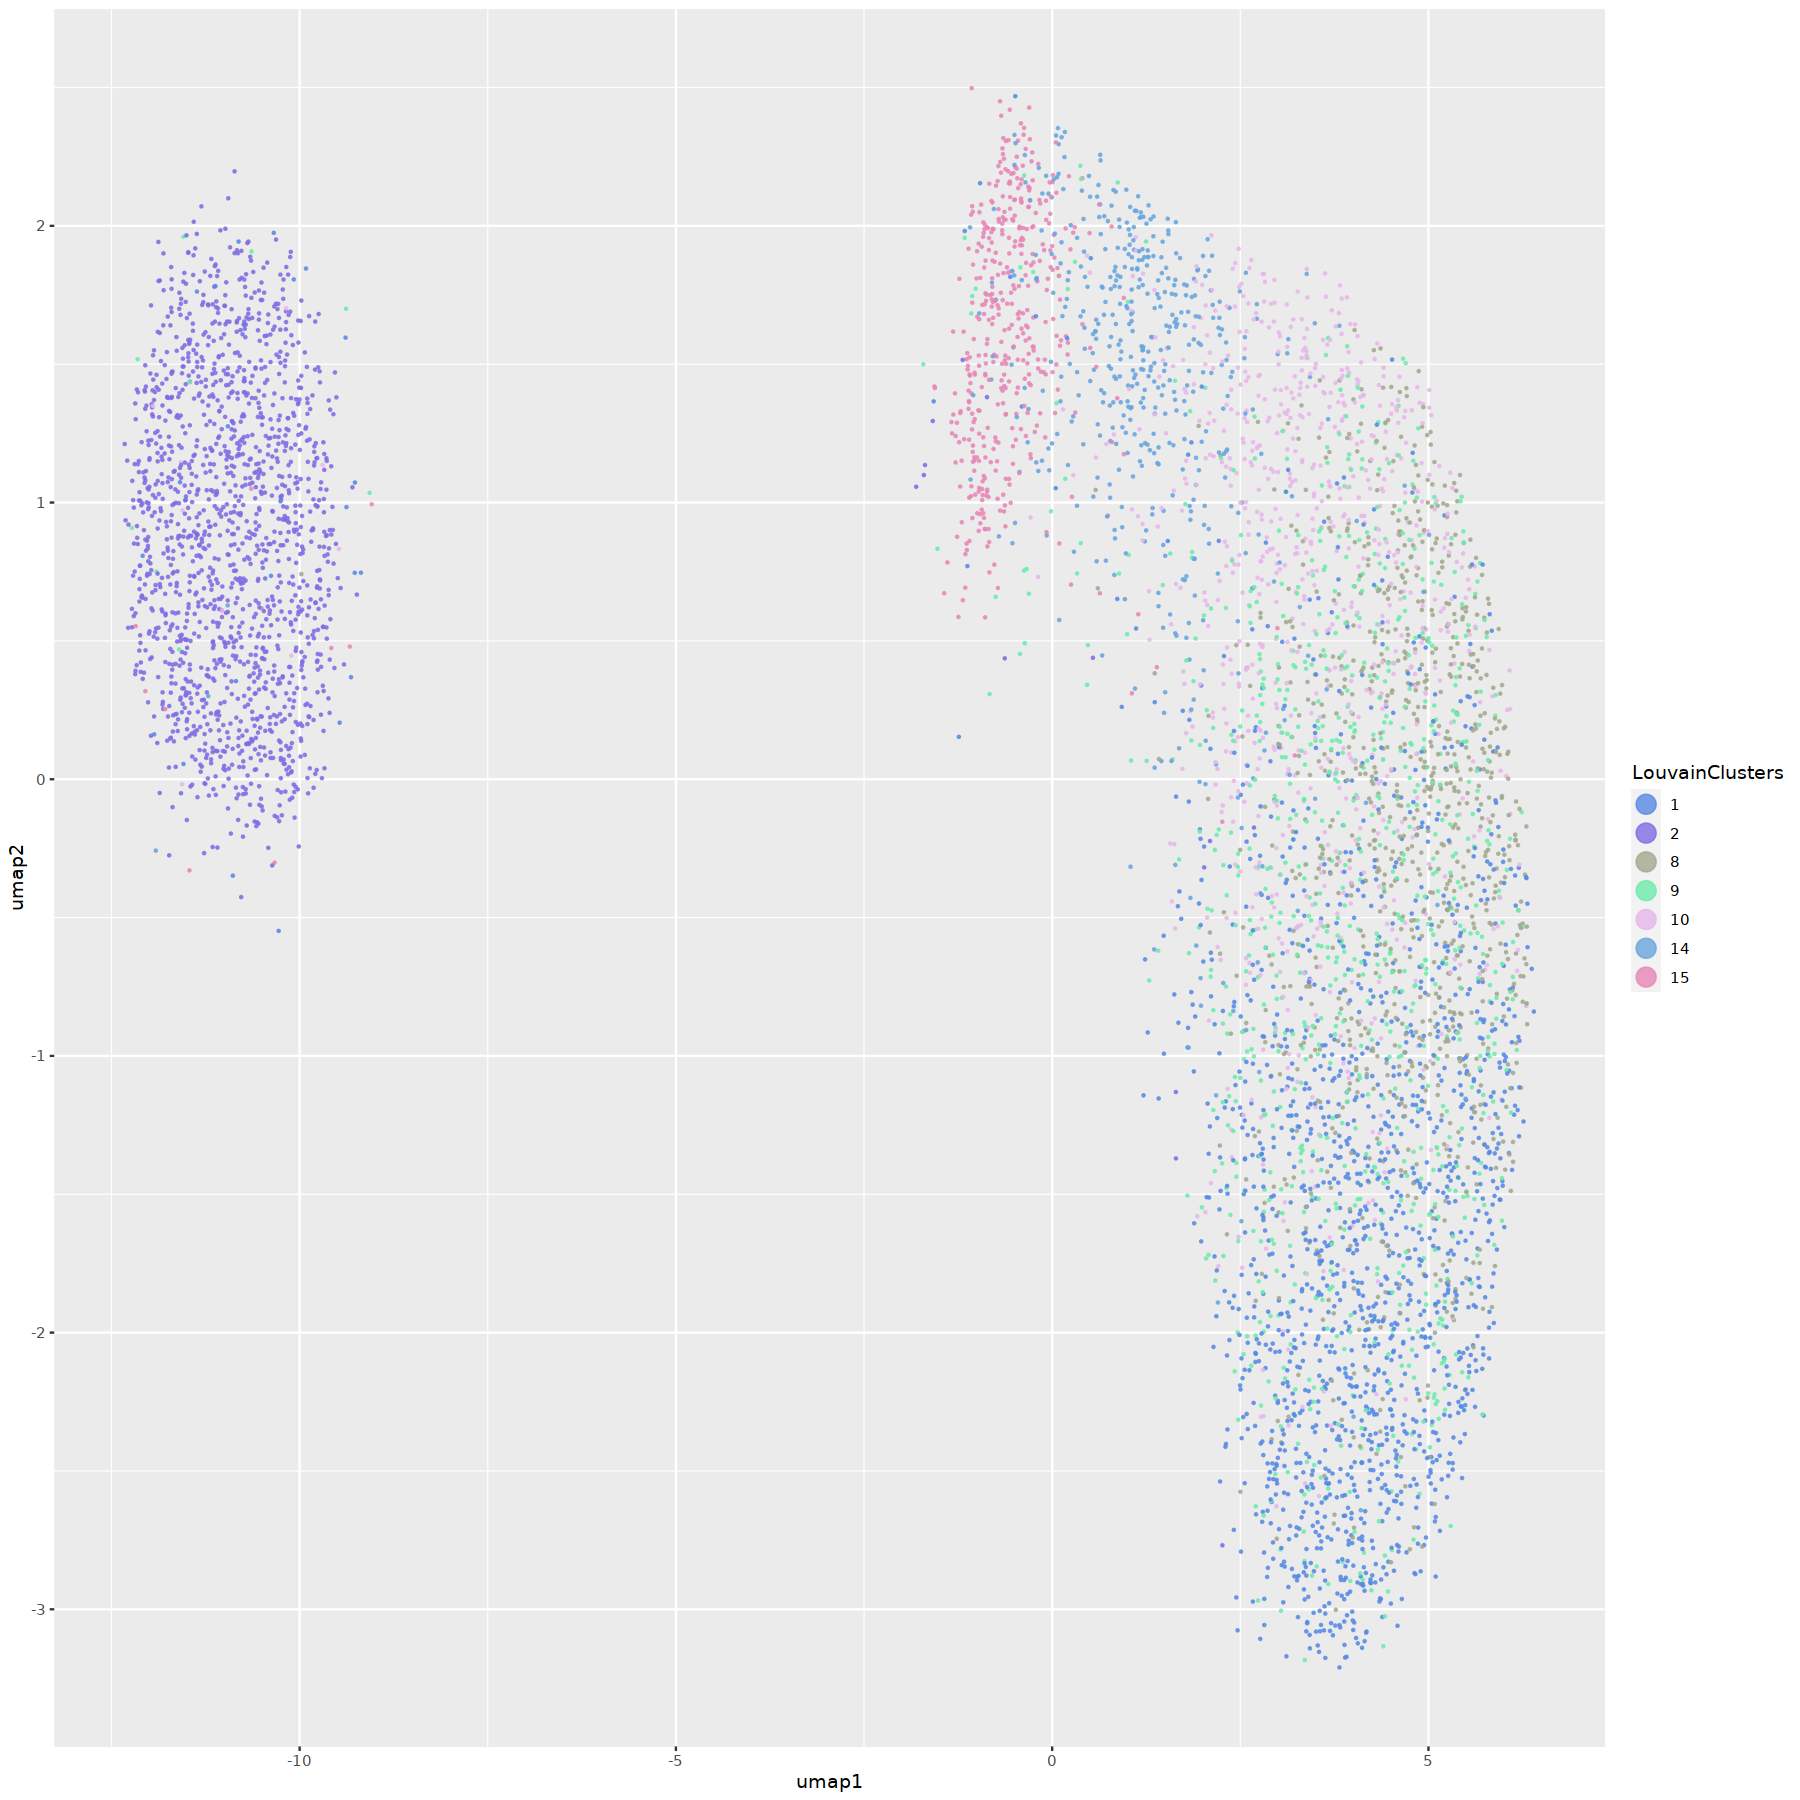

In [12]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Zm.subcluster.vaculature <- projectUMAP(Zm.subcluster.vaculature, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.25,
                       svd_slotName="SVD")


ggplot(Zm.subcluster.vaculature$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [14]:
# identify clusters using neighborhood graph -----------------------------
Zm.subcluster.vaculature <- callClusters(Zm.subcluster.vaculature, 
                        res=2,
                        k.near = 30,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6389
Number of edges: 265487

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.4301
Number of communities: 8
Elapsed time: 17 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



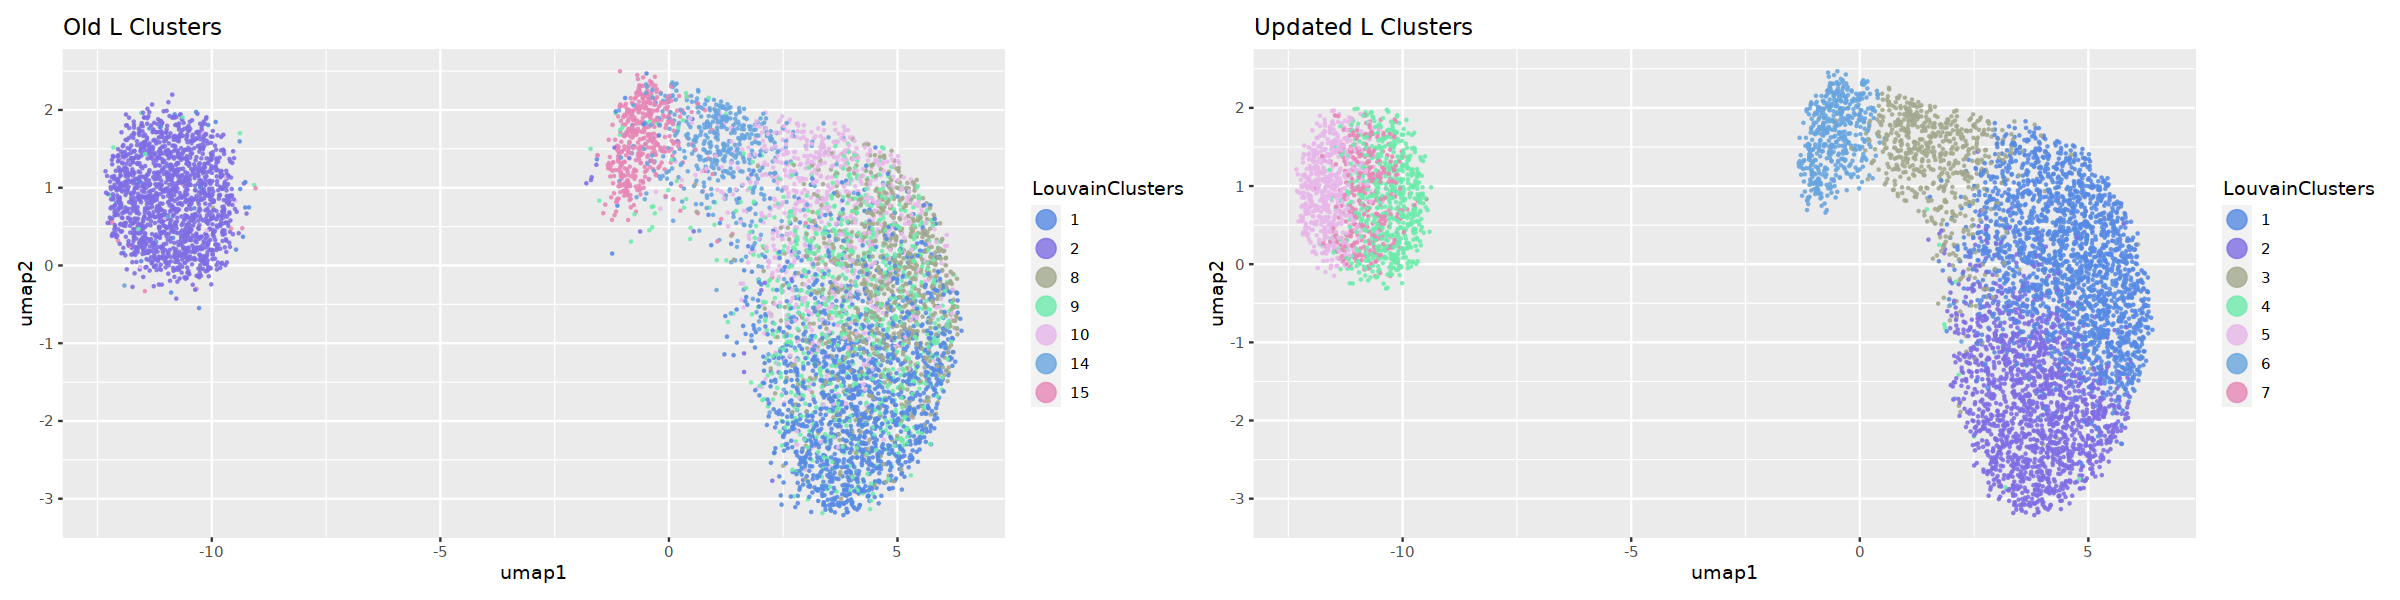

In [15]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Zm.subcluster.vaculature$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Zm.subcluster.vaculature$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [21]:

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
Zm.subcluster.vaculature <- Zm.subcluster.vaculature
Zm.subcluster.vaculature$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/Zm.gene_counts.output"

## Execute Annotation Attempt #1

library(presto)
Zm.subcluster.vaculature <- run_presto(Zm.subcluster.vaculature,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 14
  cellID       total   tss  acrs  ptmt nSites log10nSites sampleID  umap1  umap2
  <chr>        <dbl> <dbl> <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl>  <dbl>
1 BC:Z:GTGGCC… 79068 27529 40483    NA  13216        4.12 rep1      2.10  -1.25 
2 BC:Z:GTGGCC… 43371 21084 35438    NA  11561        4.06 rep1     -1.04   1.29 
3 BC:Z:GTCCGC… 39209 17750 29628    NA  10210        4.01 rep1      0.279  1.98 
4 BC:Z:GTGAAA… 38829 18370 28469    NA   9699        3.99 rep1     -0.908  1.10 
5 BC:Z:GTGAAA… 37542 12052 17701    NA   6700        3.83 rep1      4.68   0.126
6 BC:Z:GTTTCG… 33678 15656 25524    NA   9399        3.97 rep1     -0.751  1.12 
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name       barcode                                          accessability
  <chr>           <chr>                                                    <dbl>
1 Zm00001eb024370 BC:Z:AGTCAACTTGTAAGC

In [22]:
grabbed_top_marker_per_cluster <- top_markers(Zm.subcluster.vaculature$presto_marker, 200)

represented_marker_lst <- list()
for (i in unique(Zm.subcluster.vaculature$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_maize, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


$`2`
# A tibble: 4 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1     6 Zm00001eb158810 chr3  220987633 220994980 cah1   mesophyll        axill…
2    16 Zm00001eb383680 chr9   70927063  70932470 pepc1  mesophyll        axill…
3   106 Zm00001eb092540 chr2  147040782 147041974 ssu2   bundle_sheath    axill…
4   150 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1 metaphloem_siev… axill…

$`6`
# A tibble: 1 × 8
   rank geneID          chr      start      end name  type                tissue
  <int> <chr>           <chr>    <dbl>    <dbl> <chr> <chr>               <chr> 
1     1 Zm00001eb084940 chr2  66223855 66236990 ba2   axillary_meristem,… axill…

$`1`
# A tibble: 3 × 8
   rank geneID          chr       start       end name  type      tissue        
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>     <chr>         
1     2 Zm00001eb158810 chr3  220987633 220994980 cah1  mesophyll axillaryBud;l…
2     5 Zm00001eb383680 chr9   70927063  70932470 pepc1 mesophyll axillaryBud;l…
3    18 Zm00001eb359190 chr8  150377960 150388567 cah6  mesophyll axillaryBud;l…

$`4`
# A tibble: 3 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1     3 Zm00001eb313510 chr7  123684235 123693464 gl1    epidermis        axill…
2    89 Zm00001eb050790 chr1  258566321 258579264 bhlh43 bundle_sheath    axill…
3   100 Zm00001eb171720 chr4   30910426  30916600 ocl5   protoderm,L1_SA… axill…

$`3`
# A tibble: 2 × 8
   rank geneID          chr      start      end name  type                tissue
  <int> <chr>           <chr>    <dbl>    <dbl> <chr> <chr>               <chr> 
1     4 Zm00001eb084940 chr2  66223855 66236990 ba2   axillary_meristem,… axill…
2   112 Zm00001eb383680 chr9  70927063 70932470 pepc1 mesophyll           axill…

$`7`
# A tibble: 1 × 8
   rank geneID          chr       start       end name  type      tissue        
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>     <chr>         
1     3 Zm00001eb313510 chr7  123684235 123693464 gl1   epidermis axillaryBud;l…

$`5`
# A tibble: 3 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     5 Zm00001eb313510 chr7  123684235 123693464 gl1              epide… axill…
2   119 Zm00001eb171720 chr4   30910426  30916600 ocl5             proto… axill…
3   124 Zm00001eb344950 chr8   77536955  77542082 fama_v4v5count_1 guard… axill…

In [41]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Zm_leaf.merged_replicates.Subclustering_mesophyll.LouvainCluster_annot_V3.presto.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster rank geneID          chr  start     end      
1  1               34  Zm00001eb223190 chr5  36008903  36017433
2  1               61  Zm00001eb383680 chr9  70927063  70932470
3  1              119  Zm00001eb092540 chr2 147040782 147041974
4  1              176  Zm00001eb004320 chr1  12064978  12072983
5  1              179  Zm00001eb301160 chr7   9428502   9434146
6  10               7  Zm00001eb313510 chr7 123684235 123693464
7  10              45  Zm00001eb171720 chr4  30910426  30916600
8  10             115  Zm00001eb344950 chr8  77536955  77542082
9  11               1  Zm00001eb084940 chr2  66223855  66236990
10 12               7  Zm00001eb158810 chr3 220987633 220994980
11 12              87  Zm00001eb092540 chr2 147040782 147041974
12 13               3  Zm00001eb313510 chr7 123684235 123693464
13 13             195  Zm00001eb223190 chr5  36008903  36017433
14 14               1  Zm00001eb084940 chr2  66223855  66236990
15 14              14  Zm00001eb233720 chr5  91220184  91225235
16 14              40  Zm00001eb393080 chr9 128931828 128934057
17 14              41  Zm00001eb393070 chr9 128931645 128933956
18 14              77  Zm00001eb126140 chr3  27678358  27686014
19 14              85  Zm00001eb223190 chr5  36008903  36017433
20 14             136  Zm00001eb404260 chr9 161041363 161050565
21 2                2  Zm00001eb158810 chr3 220987633 220994980
22 2                5  Zm00001eb383680 chr9  70927063  70932470
23 2               26  Zm00001eb359190 chr8 150377960 150388567
24 3                5  Zm00001eb158810 chr3 220987633 220994980
25 3               26  Zm00001eb383680 chr9  70927063  70932470
26 4                3  Zm00001eb158810 chr3 220987633 220994980
27 4                7  Zm00001eb383680 chr9  70927063  70932470
28 4               19  Zm00001eb359190 chr8 150377960 150388567
29 5                2  Zm00001eb313510 chr7 123684235 123693464
30 5               18  Zm00001eb050790 chr1 258566321 258579264
31 6                2  Zm00001eb158810 chr3 220987633 220994980
32 6               59  Zm00001eb359190 chr8 150377960 150388567
33 6              103  Zm00001eb092540 chr2 147040782 147041974
34 6              138  Zm00001eb383680 chr9  70927063  70932470
35 6              194  Zm00001eb004320 chr1  12064978  12072983
36 6              197  Zm00001eb038930 chr1 207808564 207812703
37 7                4  Zm00001eb084940 chr2  66223855  66236990
38 7              144  Zm00001eb383680 chr9  70927063  70932470
39 7              160  Zm00001eb378150 chr9  25170886  25178773
40 8                4  Zm00001eb158810 chr3 220987633 220994980
41 8                5  Zm00001eb383680 chr9  70927063  70932470
42 9                5  Zm00001eb313510 chr7 123684235 123693464
43 9              145  Zm00001eb171720 chr4  30910426  30916600
44 9              168  Zm00001eb344950 chr8  77536955  77542082
   name            
1  ZmNEN1          
2  pepc1           
3  ssu2            
4  nod             
5  cvl2            
6  gl1             
7  ocl5            
8  fama_v4v5count_1
9  ba2             
10 cah1            
11 ssu2            
12 gl1             
13 ZmNEN1          
14 ba2             
15 bm5             
16 bk1_v4v5count_2 
17 bk1_v4v5count_1 
18 ocl1            
19 ZmNEN1          
20 rld1            
21 cah1            
22 pepc1           
23 cah6            
24 cah1            
25 pepc1           
26 cah1            
27 pepc1           
28 cah6            
29 gl1             
30 bhlh43          
31 cah1            
32 cah6            
33 ssu2            
34 pepc1           
35 nod             
36 mdh6            
37 ba2             
38 pepc1           
39 nst1            
40 cah1            
41 pepc1           
42 gl1             
43 ocl5            
44 fama_v4v5count_1
   type                                                                                                                                                                                                                        

In [42]:

prefix <- "Zm_leaf.merged_replicates.Subclustering_mesophyll"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/"
paste0(data_path, prefix,".merged_clusters.sparse")
# output text files
nmf.meta <- Zm.subcluster.vaculature$sub_cluster
nmf.rd <- Zm.subcluster.vaculature$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Zm.subcluster.vaculature$counts))
trip$i <- rownames(Zm.subcluster.vaculature$counts)[trip$i]
trip$j <- colnames(Zm.subcluster.vaculature$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")

saveRDS(Zm.subcluster.vaculature, file = paste0(output_location, prefix, ".rds"))

[1] "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/Zm_leaf.merged_replicates.Subclustering_mesophyll.merged_clusters.sparse"

# Subclustering Weird Clusters

In [7]:
Zm.subcluster.vaculature <- Zm.subcluster

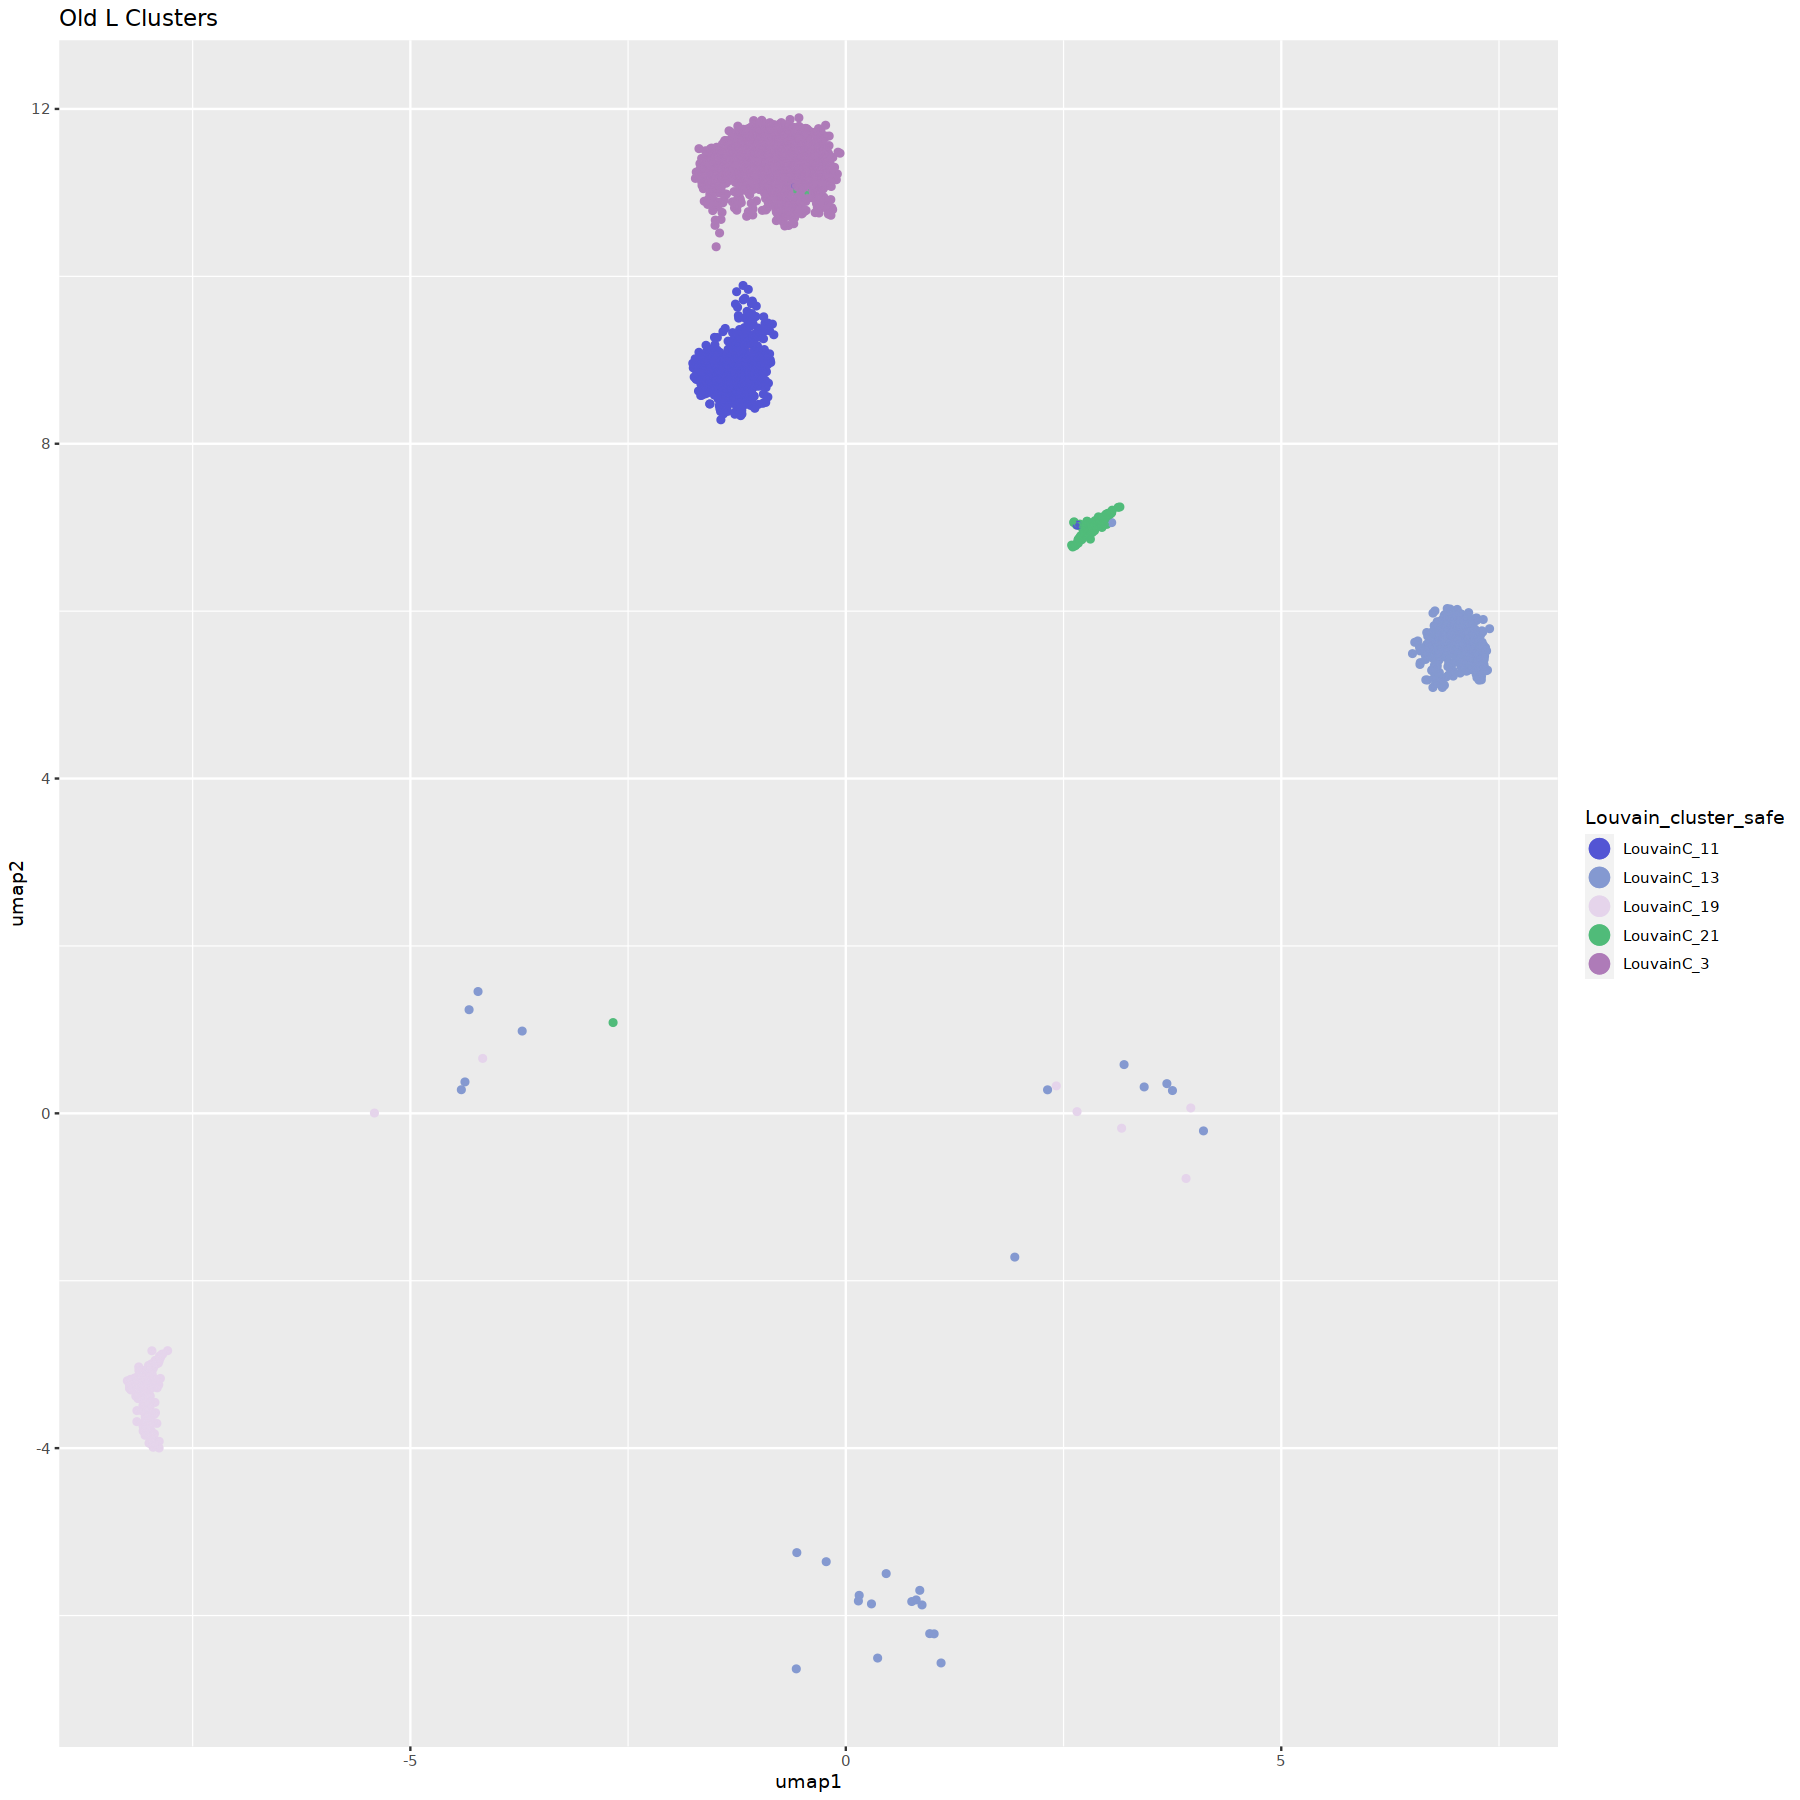

In [8]:
options(repr.plot.width=15, repr.plot.height=15)
loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in% c("LouvainC_3", "LouvainC_11","LouvainC_13",
                                      "LouvainC_19", "LouvainC_21"))  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

vascular_lineages <- loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in%  c("LouvainC_3", "LouvainC_11",
                                        "LouvainC_13","LouvainC_19",
                                        "LouvainC_21"))

meta_df <- as.data.frame(vascular_lineages)
rownames(meta_df) <- meta_df$cellID
Zm.subcluster.vaculature$meta <- meta_df
Zm.subcluster.vaculature$meta.v3 <- meta_df


Zm.subcluster.vaculature$acr <- read.table("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/LouvainClustering_bws/Zm.LouvainCluster.V3.500bp_peaks.fixed.bed")

In [41]:
Zm.subcluster.vaculature <- generateMatrix(Zm.subcluster.vaculature, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                              verbose=TRUE)


## Generate Sparse Matrix
Zm.subcluster.vaculature <- convertSparseData(Zm.subcluster.vaculature, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [42]:
# clean sparse counts matrix ---------------------------------------------
Zm.subcluster.vaculature.clean <- cleanData(Zm.subcluster.vaculature, 
                     min.t=0.005,  # minimum feature frequency across cells
                     max.t=0.1, # maximum feature frequency across cells
                     verbose=T)


   * Input: cells = 3155 | peaks = 94819

   * Filtered: cells = 3113 | peaks = 58311



In [43]:
# normalize with TFIDF ---------------------------------------------------
Zm.subcluster.vaculature <- tfidf(Zm.subcluster.vaculature.clean)

# project with NMF -------------------------------------------------------
Zm.subcluster.vaculature <- reduceDims(Zm.subcluster.vaculature,
                      method="SVD", 
                      n.pcs=30, 
                      cor.max=0.75,
                      num.var=50000,
                      svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

09:48:50 UMAP embedding parameters a = 1.577 b = 0.8951

09:48:50 Read 3113 rows and found 29 numeric columns

09:48:50 Using Annoy for neighbor search, n_neighbors = 30

09:48:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:48:51 Writing NN index file to temp file /tmp/Rtmpj5iVDe/file3f027e07edc9

09:48:51 Searching Annoy index using 24 threads, search_k = 3000

09:48:51 Annoy recall = 100%

09:49:05 Commencing smooth kNN distance calibration using 24 threads

09:49:10 Initializing from normalized Laplacian + noise

09:49:10 Commencing optimization for 500 epochs, with 128236 positive edges

09:49:33 Optimization finished



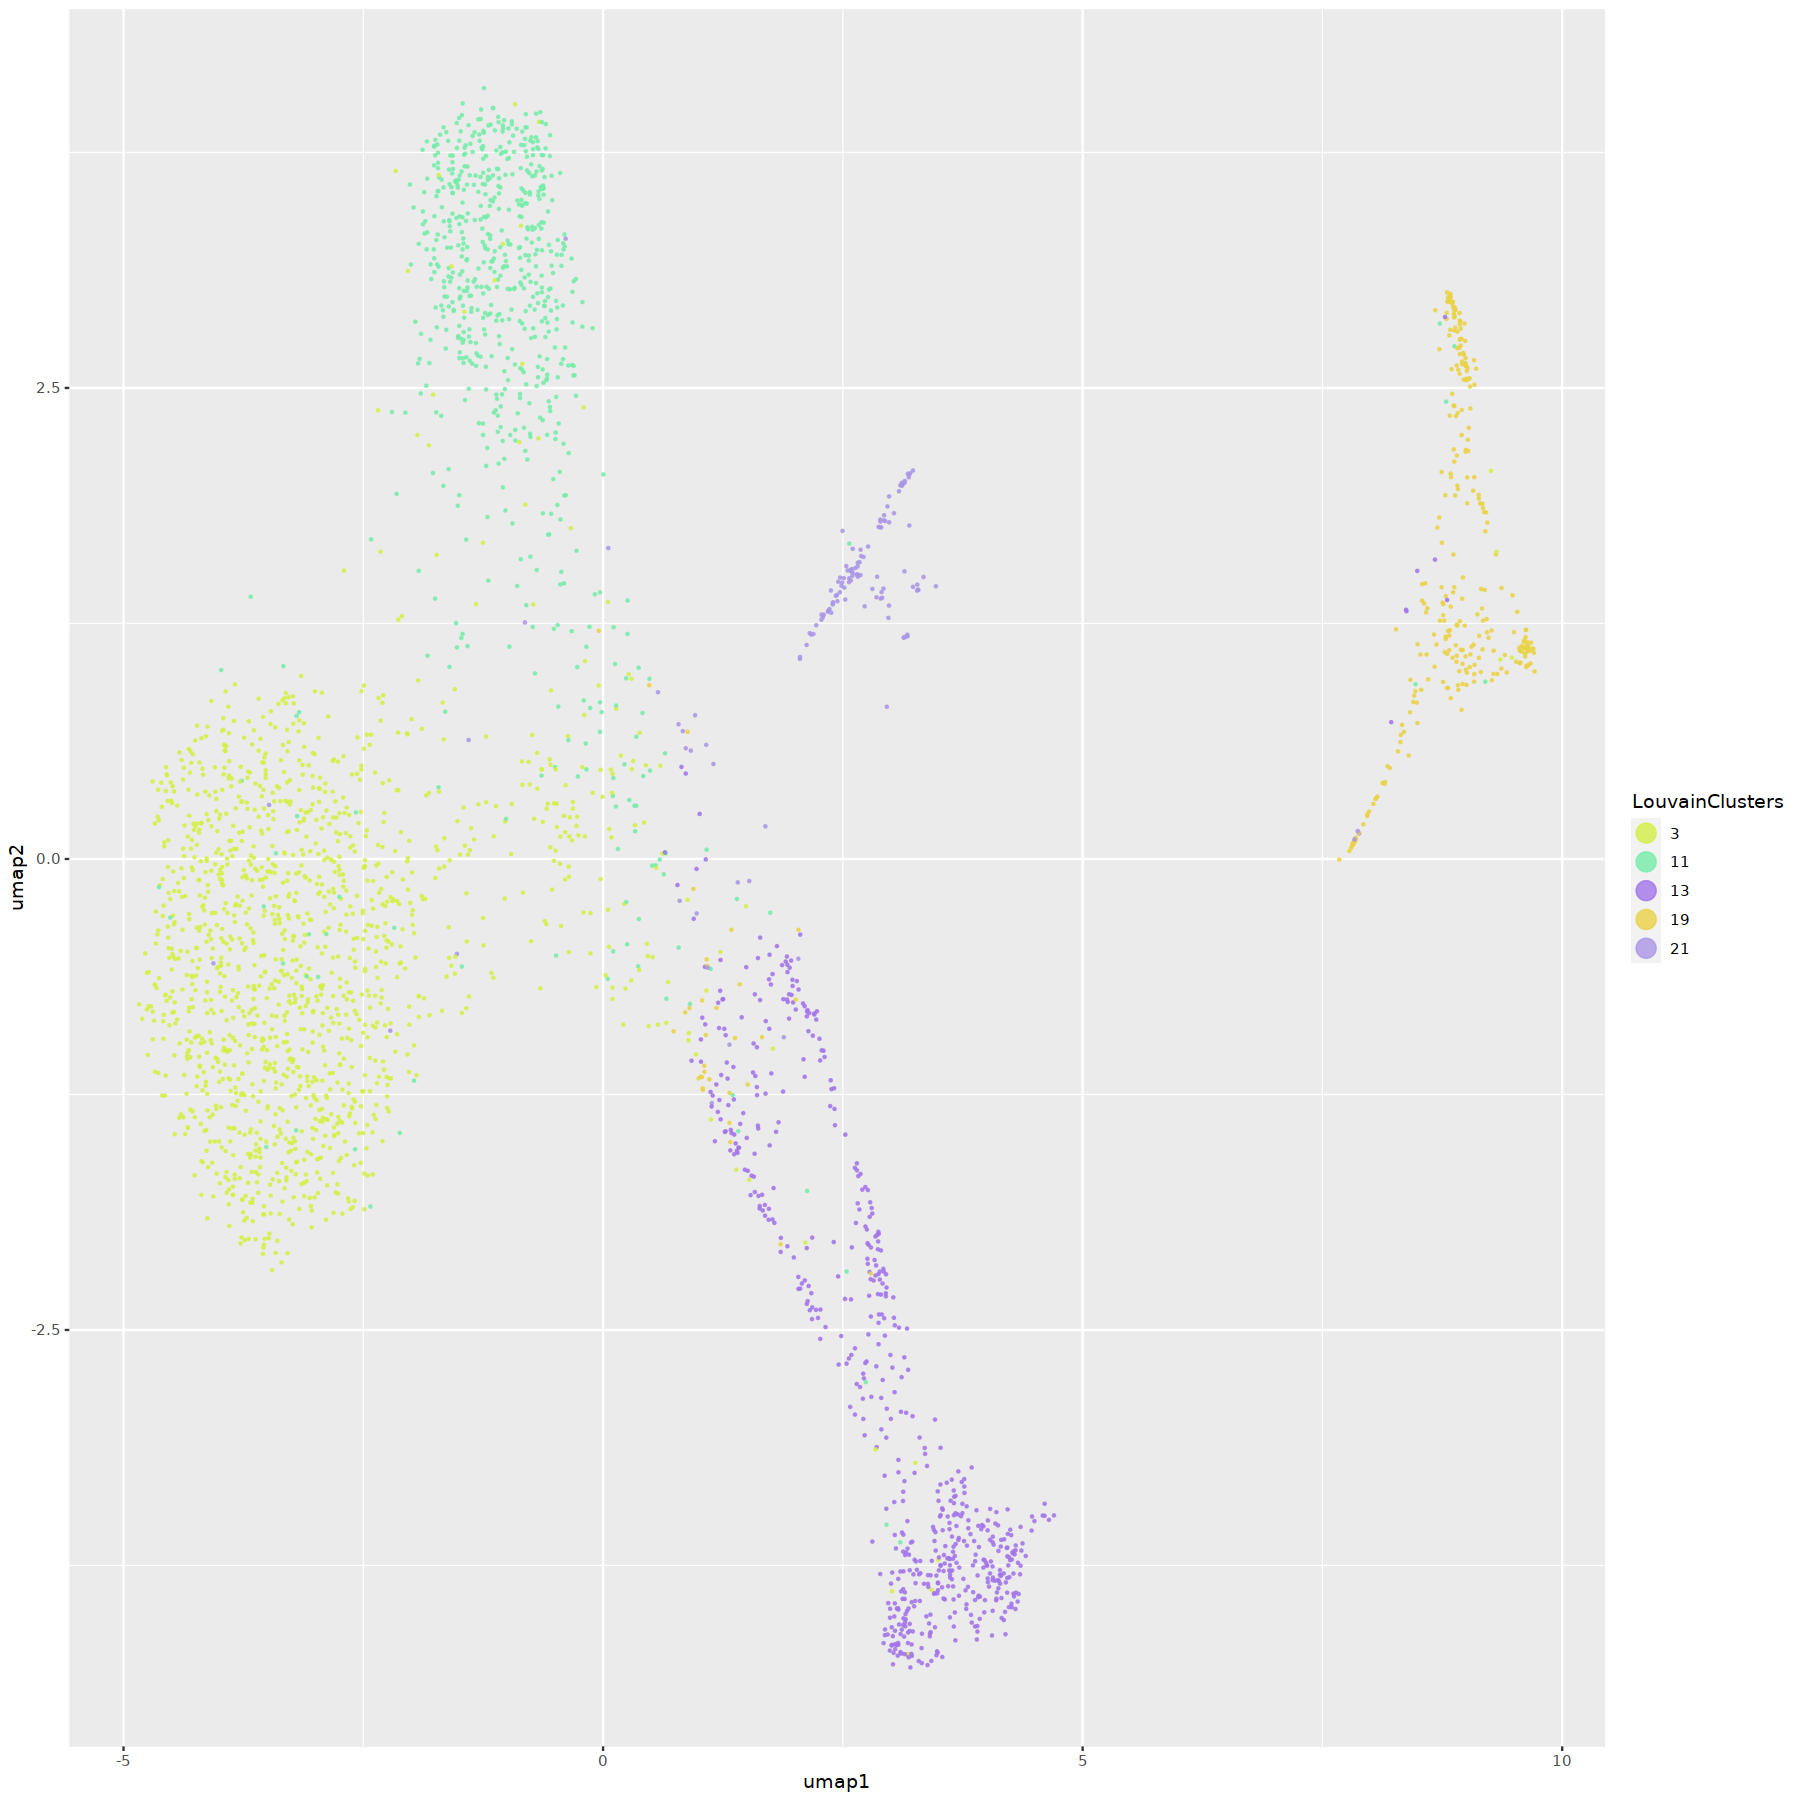

In [44]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Zm.subcluster.vaculature <- projectUMAP(Zm.subcluster.vaculature, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(Zm.subcluster.vaculature$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [45]:
# identify clusters using neighborhood graph -----------------------------
Zm.subcluster.vaculature <- callClusters(Zm.subcluster.vaculature, 
                        res=2,
                        k.near = 15,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3066
Number of edges: 106593

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.5619
Number of communities: 10
Elapsed time: 6 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



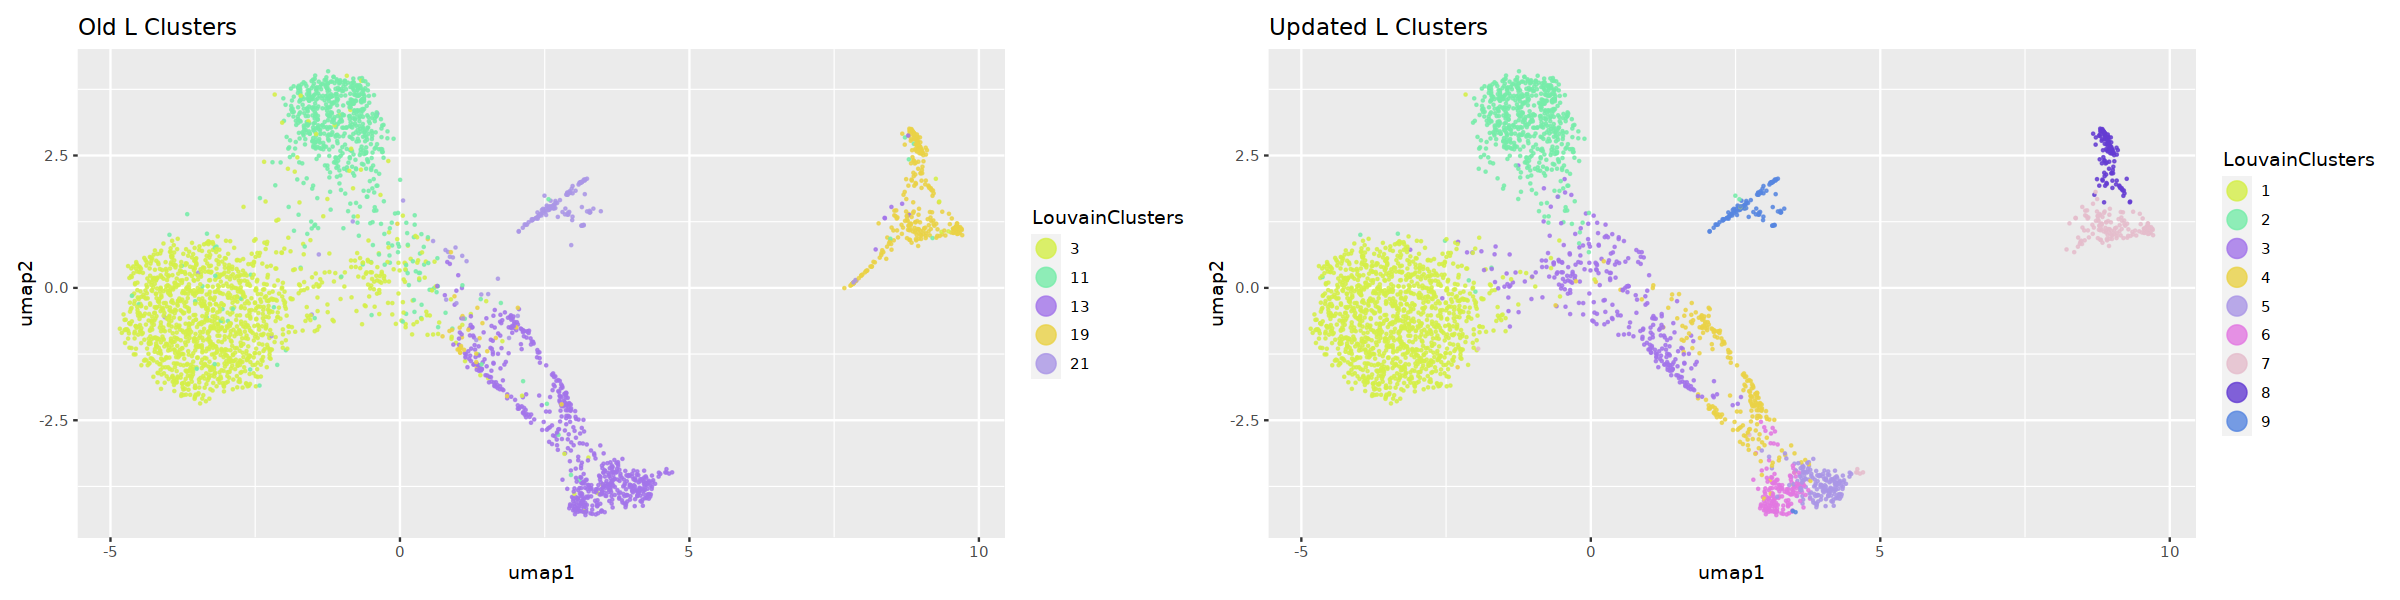

In [46]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Zm.subcluster.vaculature$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Zm.subcluster.vaculature$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [37]:

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
Zm.subcluster.vaculature <- Zm.subcluster.vaculature
Zm.subcluster.vaculature$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/Zm.gene_counts.output"

## Execute Annotation Attempt #1

library(presto)
Zm.subcluster.vaculature <- run_presto(Zm.subcluster.vaculature,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 14
  cellID      total   tss  acrs  ptmt nSites log10nSites sampleID   umap1  umap2
  <chr>       <dbl> <dbl> <dbl> <dbl>  <dbl>       <dbl> <chr>      <dbl>  <dbl>
1 BC:Z:GTGA… 130500 30598 43932    NA  14526        4.16 rep1      -0.788 -10.9 
2 BC:Z:GTGG…  79068 27529 40483    NA  13216        4.12 rep1      10.7     9.24
3 BC:Z:CGTA…  53708 17311 26815    NA   9515        3.98 rep1      -8.76    6.07
4 BC:Z:GAGT…  51177 10671 14377    NA   5797        3.76 rep1      -8.76    6.23
5 BC:Z:GTCC…  38702 10158 15059    NA   5743        3.76 rep1      -0.353 -12.8 
6 BC:Z:GTTT…  35278 17834 29024    NA   9707        3.99 rep1     -10.3     8.38
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name       barcode                                          accessability
  <chr>           <chr>                                                    <dbl>
1 Zm00001eb024370 BC:Z:AGTCAACTTGTAAGC

In [38]:
grabbed_top_marker_per_cluster <- top_markers(Zm.subcluster.vaculature$presto_marker, 200)

represented_marker_lst <- list()
for (i in unique(Zm.subcluster.vaculature$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_maize, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

$`7`
# A tibble: 5 × 8
   rank geneID          chr       start       end name  type              tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>             <chr> 
1     1 Zm00001eb033390 chr1  185941269 185953288 dct2  bundle_sheath     axill…
2     3 Zm00001eb121470 chr3    7184482   7190135 me3   bundle_sheath     axill…
3     5 Zm00001eb084940 chr2   66223855  66236990 ba2   axillary_meriste… axill…
4    25 Zm00001eb197410 chr4  196177320 196178190 ssu1  bundle_sheath     axill…
5   144 Zm00001eb092540 chr2  147040782 147041974 ssu2  bundle_sheath     axill…

$`1`
# A tibble: 5 × 8
   rank geneID          chr       start       end name  type            tissue  
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>           <chr>   
1     2 Zm00001eb158810 chr3  220987633 220994980 cah1  mesophyll       axillar…
2     5 Zm00001eb383680 chr9   70927063  70932470 pepc1 mesophyll       axillar…
3    37 Zm00001eb359190 chr8  150377960 150388567 cah6  mesophyll       axillar…
4   101 Zm00001eb296990 chr6  178052132 178057800 agp2  pith_parenchyma axillar…
5   152 Zm00001eb004320 chr1   12064978  12072983 nod   stomata         axillar…

$`10`
# A tibble: 4 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1     3 Zm00001eb313510 chr7  123684235 123693464 gl1    epidermis        axill…
2   112 Zm00001eb404260 chr9  161041363 161050565 rld1   SAM,leaf_primor… axill…
3   116 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1 metaphloem_siev… axill…
4   147 Zm00001eb336530 chr8   17391163  17395311 vt2    epidermis,prova… axill…

$`2`
# A tibble: 5 × 8
   rank geneID          chr       start       end name  type              tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>             <chr> 
1     2 Zm00001eb121470 chr3    7184482   7190135 me3   bundle_sheath     axill…
2     6 Zm00001eb197410 chr4  196177320 196178190 ssu1  bundle_sheath     axill…
3    34 Zm00001eb041120 chr1  216343268 216349212 ccr1  vascular_scleren… axill…
4    43 Zm00001eb033390 chr1  185941269 185953288 dct2  bundle_sheath     axill…
5    66 Zm00001eb092540 chr2  147040782 147041974 ssu2  bundle_sheath     axill…

$`3`
# A tibble: 3 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1     5 Zm00001eb005460 chr1   15196463  15201827 sut1   companion_cells… axill…
2    35 Zm00001eb233310 chr5   88320790  88324201 ZmAPL  protophloem_sie… axill…
3    87 Zm00001eb397900 chr9  146331757 146336666 ZmLRD3 protophloem_sie… axill…

$`9`
# A tibble: 1 × 8
   rank geneID          chr      start      end name             type     tissue
  <int> <chr>           <chr>    <dbl>    <dbl> <chr>            <chr>    <chr> 
1   163 Zm00001eb344960 chr8  77541178 77544363 fama_v4v5count_2 guard_m… axill…

$`6`
# A tibble: 4 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     3 Zm00001eb046050 chr1  238442885 238446423 ad1              proto… axill…
2    41 Zm00001eb344960 chr8   77541178  77544363 fama_v4v5count_2 guard… axill…
3    64 Zm00001eb144140 chr3  169867979 169872110 te1              perip… axill…
4   177 Zm00001eb243020 chr5  173207819 173211301 ZmSMXL5          proto… axill…

$`13`
# A tibble: 6 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1     3 Zm00001eb158810 chr3  220987633 220994980 cah1   mesophyll        axill…
2     4 Zm00001eb383680 chr9   70927063  70932470 pepc1  mesophyll        axill…
3   107 Zm00001eb359190 chr8  150377960 150388567 cah6   mesophyll        axill…
4   185 Zm00001eb319090 chr7  147881484 147888019 ocl3   L1_leaf_primord… axill…


In [53]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Zm_leaf.merged_replicates.Subclustering_vasculature.LouvainCluster_annot_V3.presto.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster rank geneID          chr  start     end      
1  1               42  Zm00001eb233310 chr5  88320790  88324201
2  1               84  Zm00001eb397900 chr9 146331757 146336666
3  1              155  Zm00001eb005460 chr1  15196463  15201827
4  10               3  Zm00001eb158810 chr3 220987633 220994980
5  10              11  Zm00001eb383680 chr9  70927063  70932470
6  10              47  Zm00001eb359190 chr8 150377960 150388567
7  10              59  Zm00001eb319090 chr7 147881484 147888019
8  10             116  Zm00001eb126140 chr3  27678358  27686014
9  10             175  Zm00001eb093670 chr2 154484874 154488700
10 2                5  Zm00001eb005460 chr1  15196463  15201827
11 2               13  Zm00001eb050790 chr1 258566321 258579264
12 2               80  Zm00001eb402200 chr9 157693146 157697816
13 2              184  Zm00001eb223190 chr5  36008903  36017433
14 3               18  Zm00001eb223190 chr5  36008903  36017433
15 3               59  Zm00001eb041120 chr1 216343268 216349212
16 3              106  Zm00001eb359190 chr8 150377960 150388567
17 4                5  Zm00001eb046050 chr1 238442885 238446423
18 4               52  Zm00001eb144140 chr3 169867979 169872110
19 4               73  Zm00001eb344960 chr8  77541178  77544363
20 4              179  Zm00001eb351250 chr8 118777862 118780292
21 5              167  Zm00001eb243020 chr5 173207819 173211301
22 6                5  Zm00001eb046050 chr1 238442885 238446423
23 6              124  Zm00001eb243020 chr5 173207819 173211301
24 6              132  Zm00001eb144140 chr3 169867979 169872110
25 6              169  Zm00001eb344960 chr8  77541178  77544363
26 7               23  Zm00001eb126140 chr3  27678358  27686014
27 7               44  Zm00001eb046050 chr1 238442885 238446423
28 7               58  Zm00001eb344960 chr8  77541178  77544363
29 7               78  Zm00001eb067270 chr2   3630367   3636867
30 7              141  Zm00001eb144140 chr3 169867979 169872110
31 7              143  Zm00001eb158810 chr3 220987633 220994980
32 7              145  Zm00001eb378140 chr9  25126804  25130688
33 9               88  Zm00001eb026490 chr1 121465669 121469876
34 9              175  Zm00001eb159500 chr3 223196201 223197945
   name            
1  ZmAPL           
2  ZmLRD3          
3  sut1            
4  cah1            
5  pepc1           
6  cah6            
7  ocl3            
8  ocl1            
9  scr1h           
10 sut1            
11 bhlh43          
12 sut7            
13 ZmNEN1          
14 ZmNEN1          
15 ccr1            
16 cah6            
17 ad1             
18 te1             
19 fama_v4v5count_2
20 gpat12          
21 ZmSMXL5         
22 ad1             
23 ZmSMXL5         
24 te1             
25 fama_v4v5count_2
26 ocl1            
27 ad1             
28 fama_v4v5count_2
29 ZmMP_2          
30 te1             
31 cah1            
32 wxy1            
33 ZmLAX2          
34 tmm             
   type                                                                                                                                                                                                                                                                                                               
1  protophloem_sieve_element,metaphloem_sieve_element,phloem_sieve_element_precursors,companion_cells                                                                                                                                                                                                                 
2  protophloem_sieve_element,metaphloem_sieve_element,phloem_sieve_element_precursors,companion_cells                                                                                                                                                                                                                 
3  companion_cells,xylem_parenchyma,phloem_parenchyma,pith_parenchyma                                                             

In [54]:

prefix <- "Zm_leaf.merged_replicates.Subclustering_vasculature"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/"
paste0(data_path, prefix,".merged_clusters.sparse")
# output text files
nmf.meta <- Zm.subcluster.vaculature$sub_cluster
nmf.rd <- Zm.subcluster.vaculature$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Zm.subcluster.vaculature$counts))
trip$i <- rownames(Zm.subcluster.vaculature$counts)[trip$i]
trip$j <- colnames(Zm.subcluster.vaculature$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")

saveRDS(Zm.subcluster.vaculature, file = paste0(output_location, prefix, ".rds"))

[1] "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/Zm_leaf.merged_replicates.Subclustering_vasculature.merged_clusters.sparse"

## Subclustering Vasculature on Bins

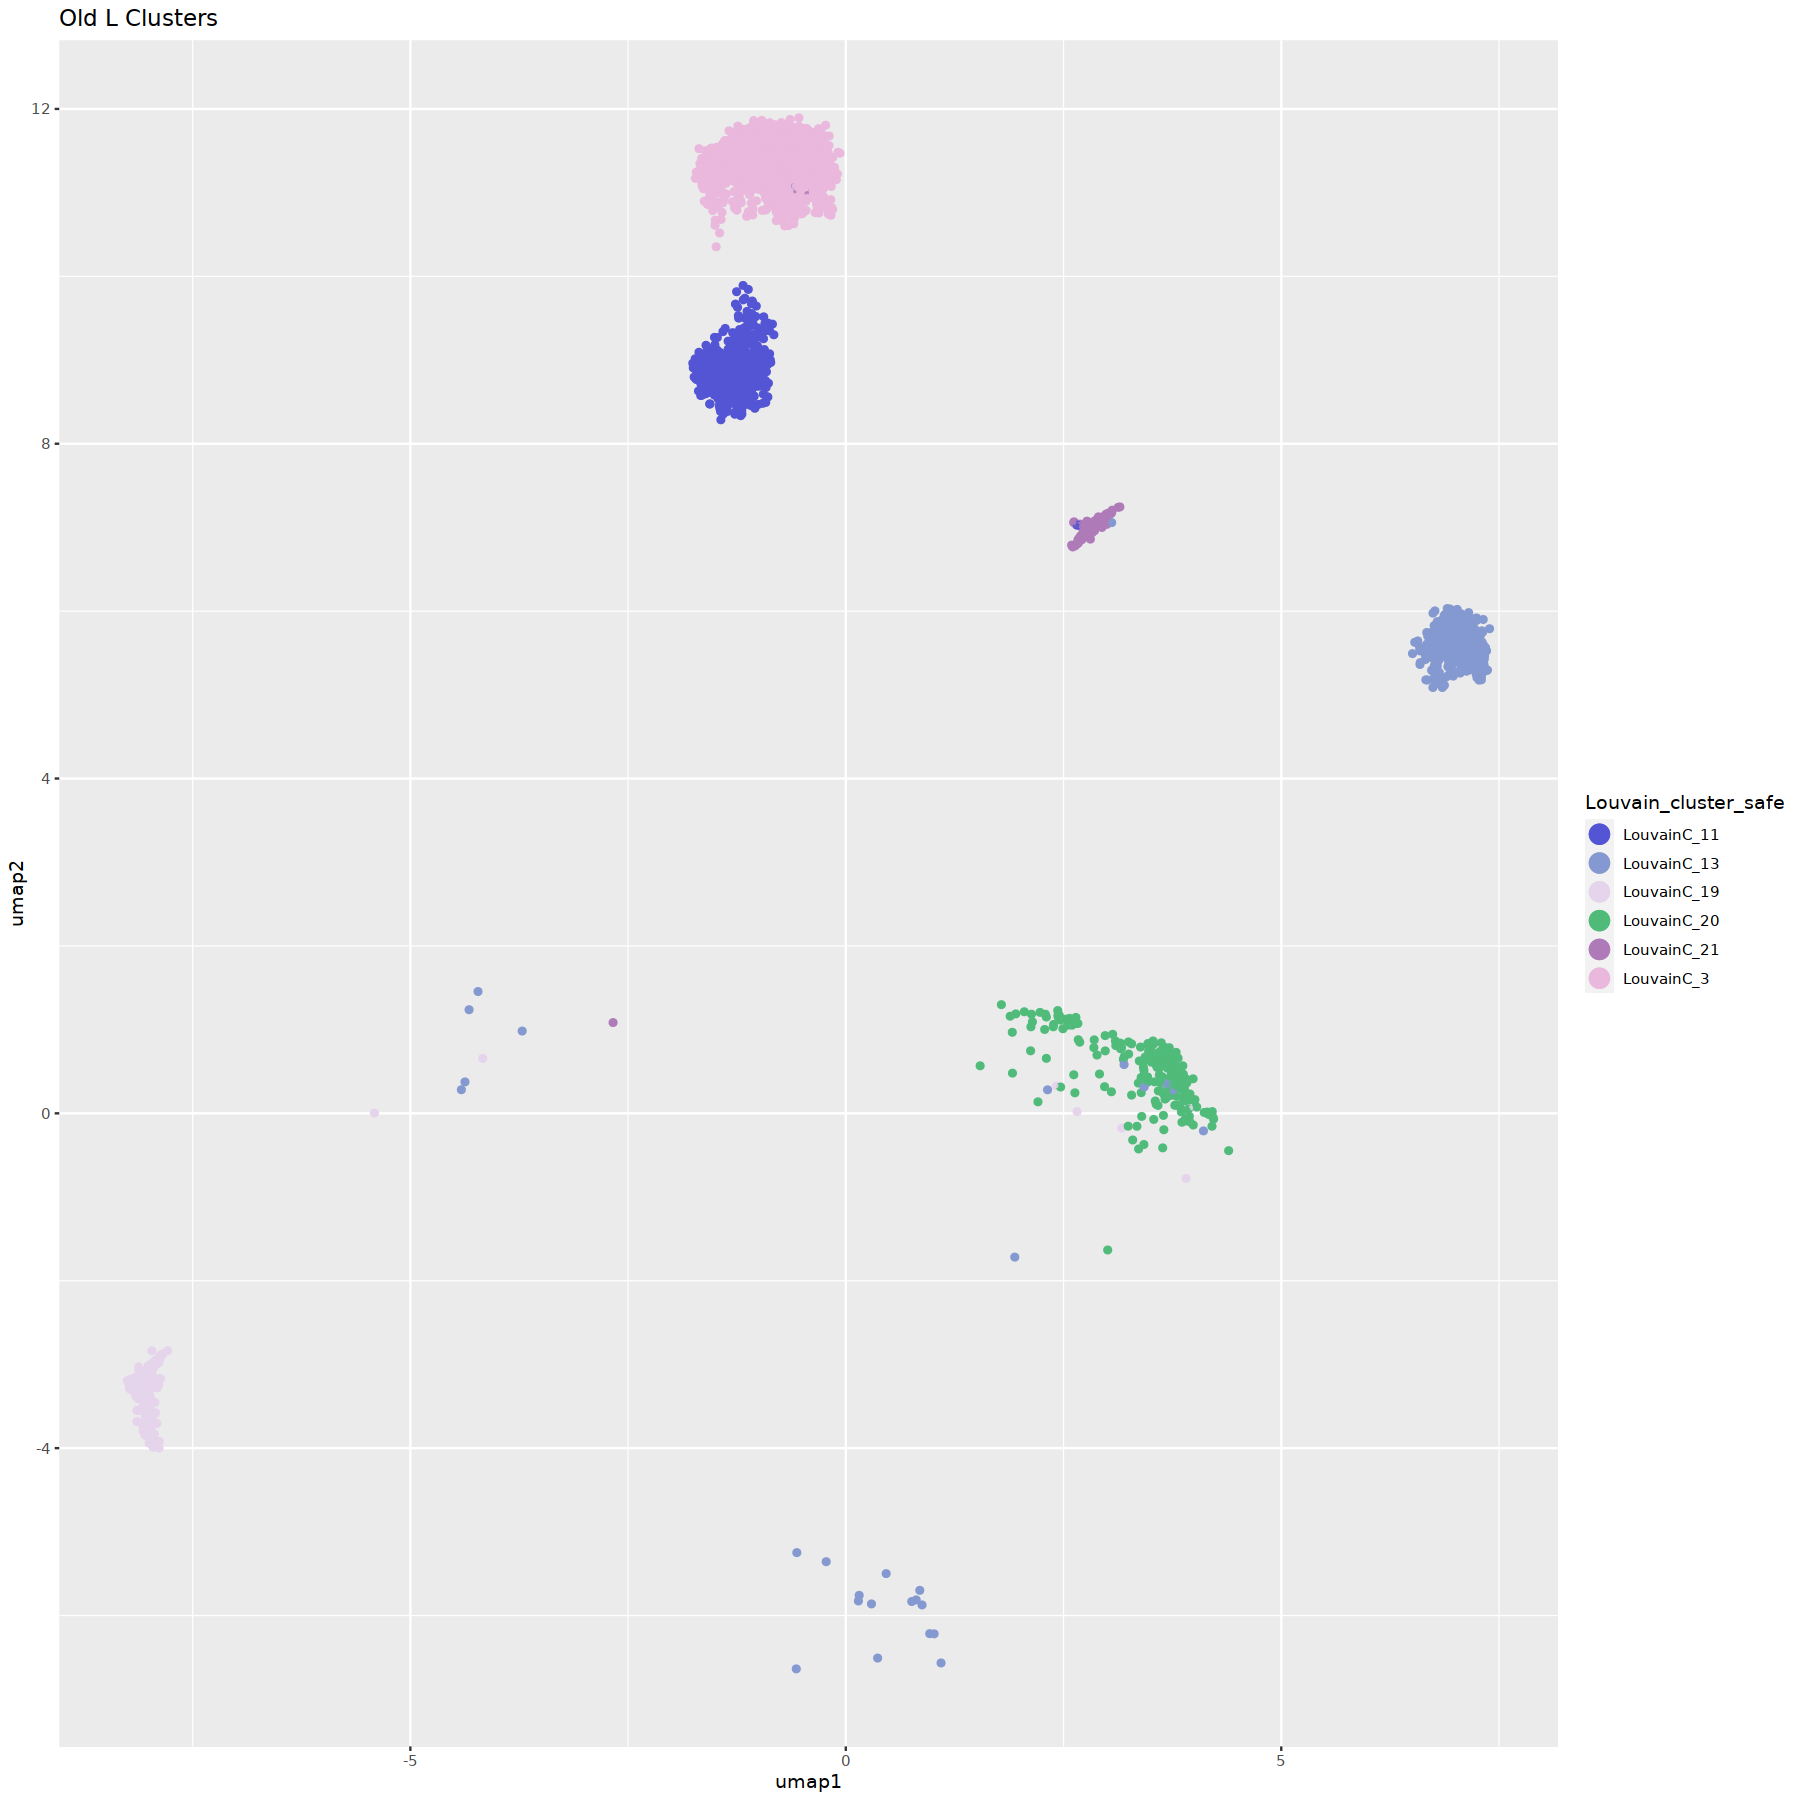

In [11]:
Zm.subcluster.vaculature <- Zm.subcluster
options(repr.plot.width=15, repr.plot.height=15)
loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in% c("LouvainC_3", "LouvainC_11","LouvainC_13",
                                      "LouvainC_19", "LouvainC_21", "LouvainC_20"))  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

vascular_lineages <- loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in%  c("LouvainC_3", "LouvainC_11",
                                        "LouvainC_13","LouvainC_19",
                                        "LouvainC_21", "LouvainC_20"))

meta_df <- as.data.frame(vascular_lineages)
rownames(meta_df) <- meta_df$cellID
Zm.subcluster.vaculature$meta <- meta_df
Zm.subcluster.vaculature$meta.v3 <- meta_df


Zm.subcluster.vaculature$acr <- read.table("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/LouvainClustering_bws/Zm.LouvainCluster.V3.500bp_peaks.fixed.bed")

In [12]:
Zm.subcluster.vaculature <- generateMatrix(Zm.subcluster.vaculature, 
                                              filtered=FALSE,
                                              peaks = FALSE,
                                              verbose=TRUE)


## Generate Sparse Matrix
Zm.subcluster.vaculature <- convertSparseData(Zm.subcluster.vaculature, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [13]:
# clean sparse counts matrix ---------------------------------------------
Zm.subcluster.vaculature.clean <- cleanData(Zm.subcluster.vaculature, 
                     min.t=0.005,  # minimum feature frequency across cells
                     #max.t=0.1, # maximum feature frequency across cells
                     verbose=T)


   * Input: cells = 3375 | peaks = 2075797

   * Filtered: cells = 3375 | peaks = 90344



In [14]:
# normalize with TFIDF ---------------------------------------------------
Zm.subcluster.vaculature <- tfidf(Zm.subcluster.vaculature.clean)

# project with NMF -------------------------------------------------------
Zm.subcluster.vaculature <- reduceDims(Zm.subcluster.vaculature,
                      method="SVD", 
                      n.pcs=30, 
                      cor.max=0.75,
                      num.var=50000,
                      svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

10:58:00 UMAP embedding parameters a = 1.577 b = 0.8951

10:58:00 Read 3375 rows and found 29 numeric columns

10:58:00 Using Annoy for neighbor search, n_neighbors = 30

10:58:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:58:01 Writing NN index file to temp file /tmp/Rtmp6a3Ps3/file1999215cb81e

10:58:01 Searching Annoy index using 24 threads, search_k = 3000

10:58:01 Annoy recall = 100%

10:58:06 Commencing smooth kNN distance calibration using 24 threads

10:58:11 Initializing from normalized Laplacian + noise

10:58:11 Commencing optimization for 500 epochs, with 157366 positive edges

10:58:38 Optimization finished



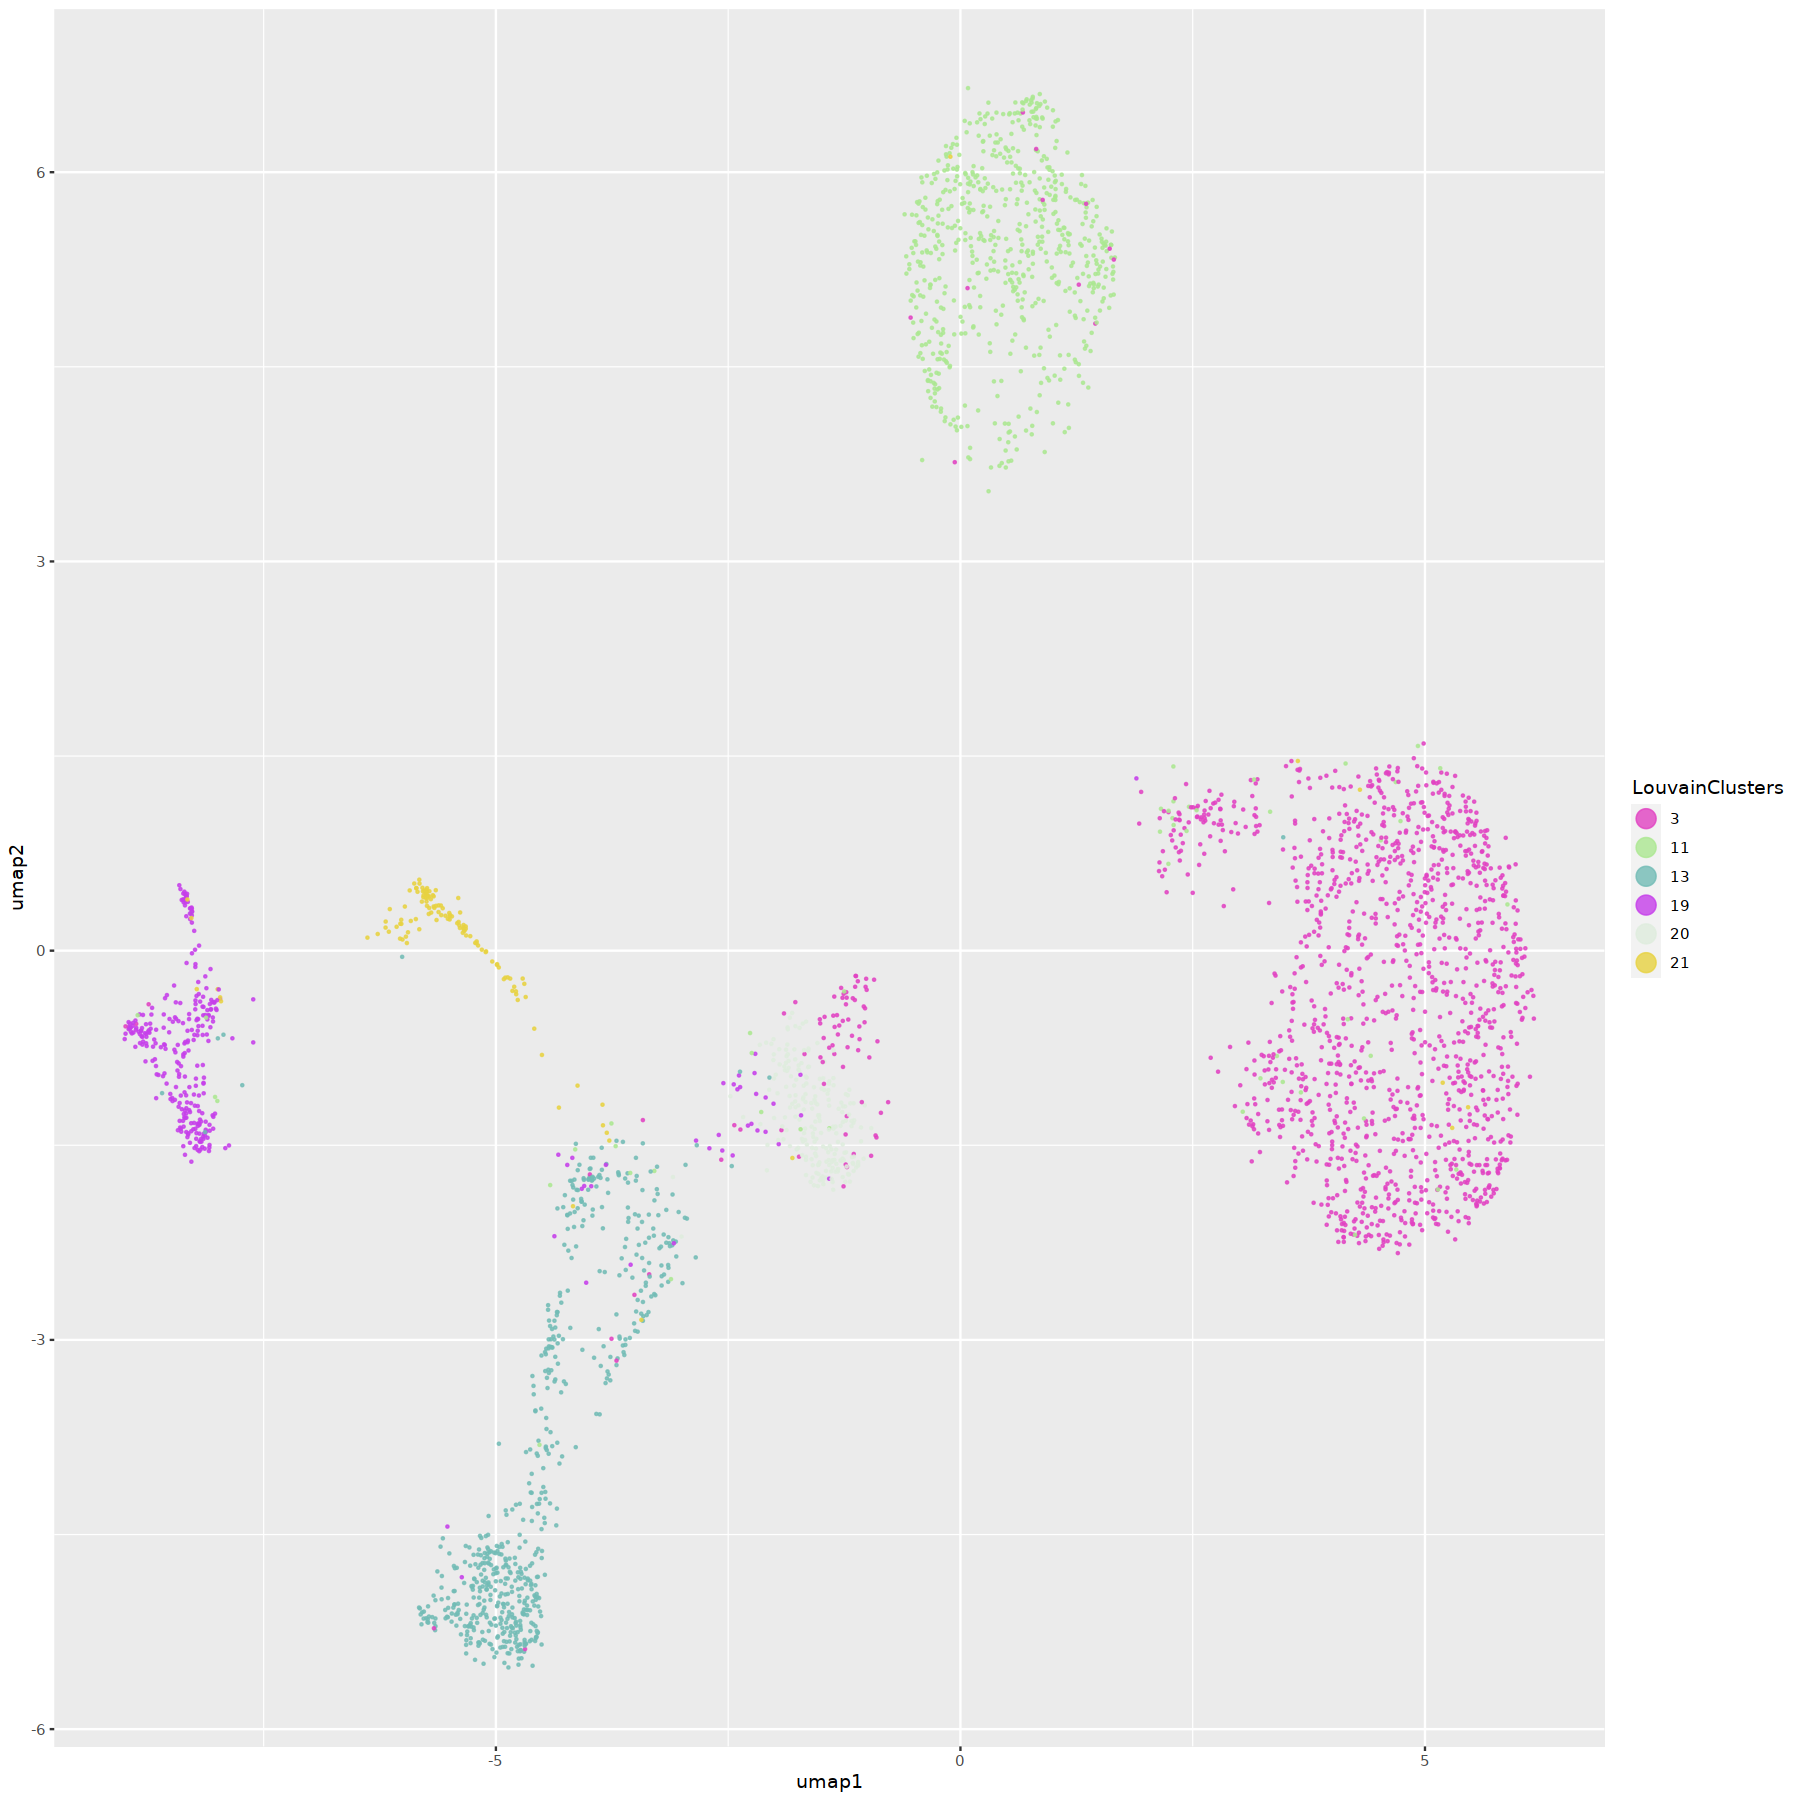

In [15]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Zm.subcluster.vaculature <- projectUMAP(Zm.subcluster.vaculature, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(Zm.subcluster.vaculature$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [23]:
# identify clusters using neighborhood graph -----------------------------
Zm.subcluster.vaculature <- callClusters(Zm.subcluster.vaculature, 
                        res=.8,
                        k.near = 15,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3313
Number of edges: 165942

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.8374
Number of communities: 9
Elapsed time: 6 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



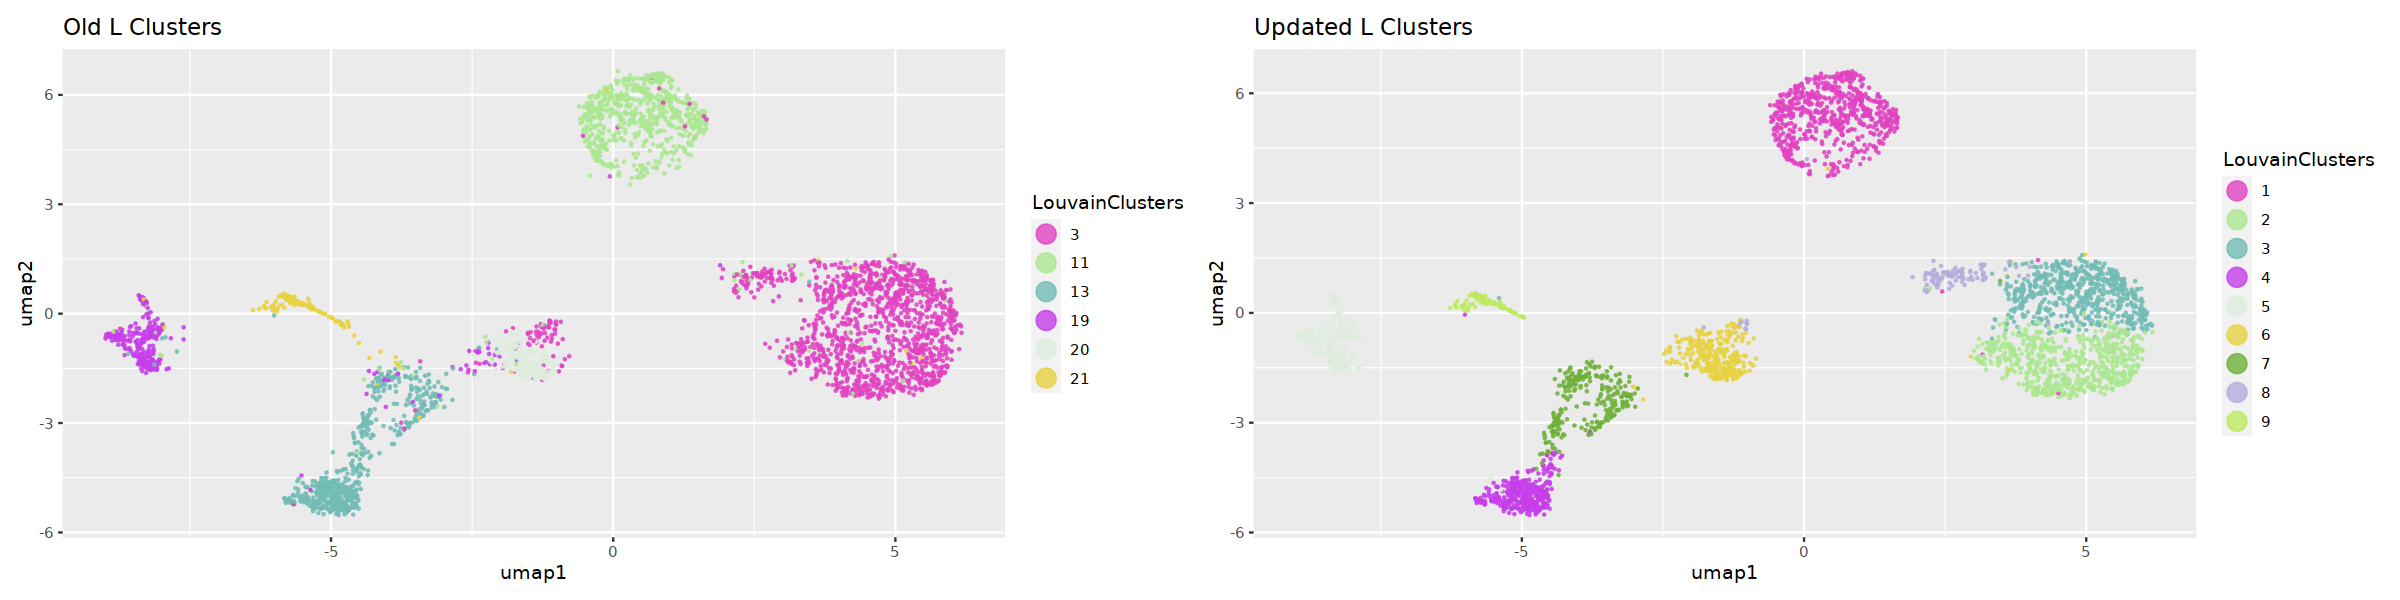

In [25]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Zm.subcluster.vaculature$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Zm.subcluster.vaculature$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [26]:

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
Zm.subcluster.vaculature <- Zm.subcluster.vaculature
Zm.subcluster.vaculature$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/Zm.gene_counts.output"

## Execute Annotation Attempt #1

library(presto)
Zm.subcluster.vaculature <- run_presto(Zm.subcluster.vaculature,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

grabbed_top_marker_per_cluster <- top_markers(Zm.subcluster.vaculature$presto_marker, 200)

represented_marker_lst <- list()
for (i in unique(Zm.subcluster.vaculature$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_maize, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

# A tibble: 6 × 14
  cellID       total   tss  acrs  ptmt nSites log10nSites sampleID  umap1  umap2
  <chr>        <dbl> <dbl> <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl>  <dbl>
1 BC:Z:CGTACG… 53708 17311 26815    NA  26078        4.42 rep1     -1.26  -0.332
2 BC:Z:GAGTGG… 51177 10671 14377    NA  27017        4.43 rep1     -1.32  -0.646
3 BC:Z:GTTTCG… 35278 17834 29024    NA  15191        4.18 rep1      2.63   1.00 
4 BC:Z:CGTACG… 33402 10670 15739    NA  16705        4.22 rep1      0.706  4.01 
5 BC:Z:GTGGCC… 32854 15260 25974    NA  15116        4.18 rep1     -3.35  -2.49 
6 BC:Z:GAGTGG… 30226 10724 18100    NA  15407        4.19 rep1     -3.35  -2.21 
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name       barcode                                          accessability
  <chr>           <chr>                                                    <dbl>
1 Zm00001eb024370 BC:Z:AGTCAACTTGTAAGC

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


$`6`
# A tibble: 4 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     5 Zm00001eb313510 chr7  123684235 123693464 gl1              epide… axill…
2   112 Zm00001eb344950 chr8   77536955  77542082 fama_v4v5count_1 guard… axill…
3   120 Zm00001eb359190 chr8  150377960 150388567 cah6             mesop… axill…
4   164 Zm00001eb319090 chr7  147881484 147888019 ocl3             L1_le… axill…

$`8`
# A tibble: 3 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1    19 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1 metaphloem_siev… axill…
2    34 Zm00001eb158810 chr3  220987633 220994980 cah1   mesophyll        axill…
3   150 Zm00001eb041120 chr1  216343268 216349212 ccr1   vascular_sclere… axill…

$`1`
# A tibble: 4 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1     2 Zm00001eb005460 chr1   15196463  15201827 sut1   companion_cells… axill…
2    15 Zm00001eb050790 chr1  258566321 258579264 bhlh43 bundle_sheath    axill…
3    73 Zm00001eb402200 chr9  157693146 157697816 sut7   companion_cells… axill…
4    96 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1 metaphloem_siev… axill…

$`7`
# A tibble: 7 × 8
   rank geneID          chr       start       end name  type              tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>             <chr> 
1     5 Zm00001eb158810 chr3  220987633 220994980 cah1  mesophyll         axill…
2    34 Zm00001eb383680 chr9   70927063  70932470 pepc1 mesophyll         axill…
3    40 Zm00001eb126140 chr3   27678358  27686014 ocl1  protoderm,L1_SAM… axill…
4    48 Zm00001eb313510 chr7  123684235 123693464 gl1   epidermis         axill…
5    67 Zm00001eb319090 chr7  147881484 147888019 ocl3  L1_leaf_primordi… axill…
6   102 Zm00001eb084940 chr2   66223855  66236990 ba2   axillary_meriste… axill…
7   119 Zm00001eb041120 chr1  216343268 216349212 ccr1  vascular_scleren… axill…

$`5`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`4`
# A tibble: 3 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     5 Zm00001eb046050 chr1  238442885 238446423 ad1              proto… axill…
2    56 Zm00001eb144140 chr3  169867979 169872110 te1              perip… axill…
3    99 Zm00001eb344960 chr8   77541178  77544363 fama_v4v5count_2 guard… axill…

$`2`
# A tibble: 4 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1     4 Zm00001eb005460 chr1   15196463  15201827 sut1   companion_cells… axill…
2    47 Zm00001eb359190 chr8  150377960 150388567 cah6   mesophyll        axill…
3    80 Zm00001eb233310 chr5   88320790  88324201 ZmAPL  protophloem_sie… axill…
4   101 Zm00001eb397900 chr9  146331757 146336666 ZmLRD3 protophloem_sie… axill…

$`3`
# A tibble: 5 × 8
   rank geneID          chr       start       end name     type           tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>    <chr>          <chr> 
1    27 Zm00001eb233310 chr5   88320790  88324201 ZmAPL    protophloem_s… axill…
2    75 Zm00001eb145670 chr3  176082042 176085456 ZmAAP6_4 xylem_parench… axill…
3   113 Zm00001eb397900 chr9  146331757 146336666 ZmLRD3   protophloem_s… axill…
4   148 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1   metaphloem_si… axill…
5   196 Zm00001eb130310 chr3   55535542  55537792 hkt1_2   xylem_parench… axill…

$`9`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>

In [28]:

prefix <- "Zm_leaf.merged_replicates.Subclustering_vasculature.bin_clustering"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/"
paste0(data_path, prefix,".merged_clusters.sparse")
# output text files
nmf.meta <- Zm.subcluster.vaculature$sub_cluster
nmf.rd <- Zm.subcluster.vaculature$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Zm.subcluster.vaculature$counts))
trip$i <- rownames(Zm.subcluster.vaculature$counts)[trip$i]
trip$j <- colnames(Zm.subcluster.vaculature$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")

saveRDS(Zm.subcluster.vaculature, file = paste0(output_location, prefix, ".rds"))

[1] "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/Zm_leaf.merged_replicates.Subclustering_vasculature.bin_clustering.merged_clusters.sparse"

# Reclustering Epidermal Lineages on Bins

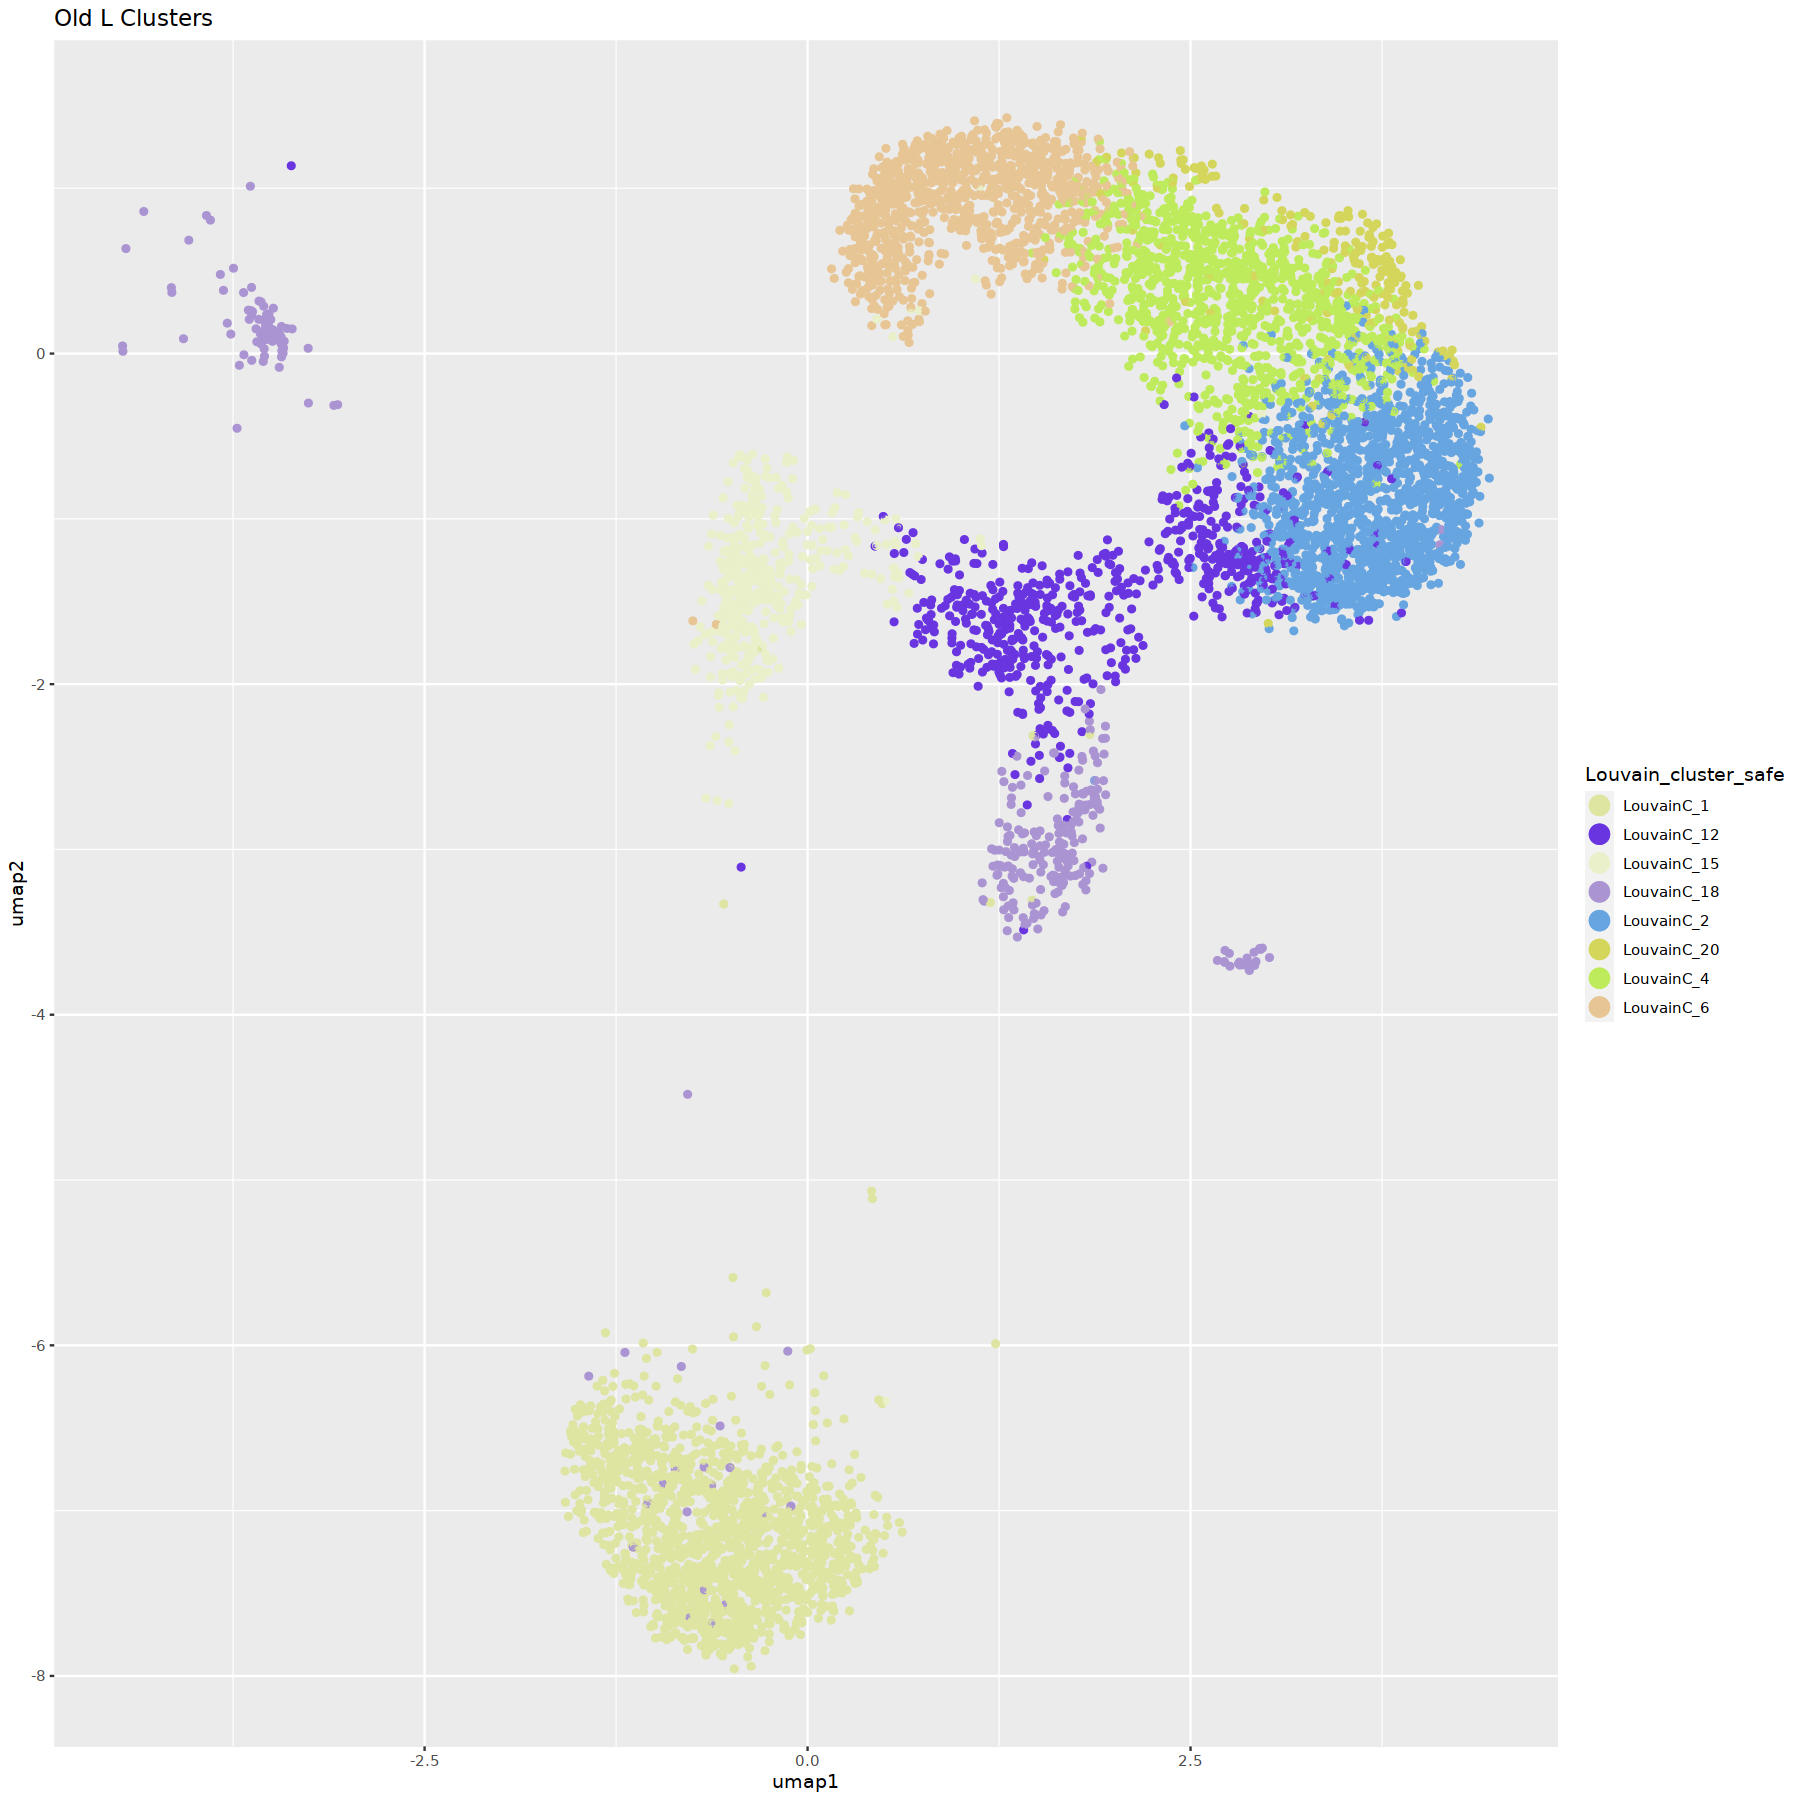

In [7]:
library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in% c("LouvainC_2", "LouvainC_12", "LouvainC_20", 
                                     "LouvainC_4", "LouvainC_6", "LouvainC_18",
                                    "LouvainC_15","LouvainC_1"))  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

chosen_subcluster <- loaded_socrates_data$Clusters  %>% 
    filter(Louvain_cluster_safe %in% c("LouvainC_2", "LouvainC_12", "LouvainC_20", 
                                     "LouvainC_4", "LouvainC_6", "LouvainC_18",
                                    "LouvainC_15", "LouvainC_1"))  

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Zm.subcluster$meta <- meta_df
Zm.subcluster$meta.v3 <- meta_df

 - converting triplet format to sparseMatrix

   * Input: cells = 6705 | peaks = 2075797

   * Filtered: cells = 6705 | peaks = 68742

 - non-linear dimensionality reduction with UMAP ...

12:05:08 UMAP embedding parameters a = 1.577 b = 0.8951

12:05:08 Read 6705 rows and found 29 numeric columns

12:05:08 Using Annoy for neighbor search, n_neighbors = 30

12:05:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:05:08 Writing NN index file to temp file /tmp/Rtmp90HcRt/file4f347d3ef999

12:05:08 Searching Annoy index using 16 threads, search_k = 3000

12:05:09 Annoy recall = 100%

12:05:13 Commencing smooth kNN distance calibration using 16 threads

12:05:18 Initializing from normalized Laplacian + noise

12:05:18 Commencing optimization for 500 epochs, with 286016 

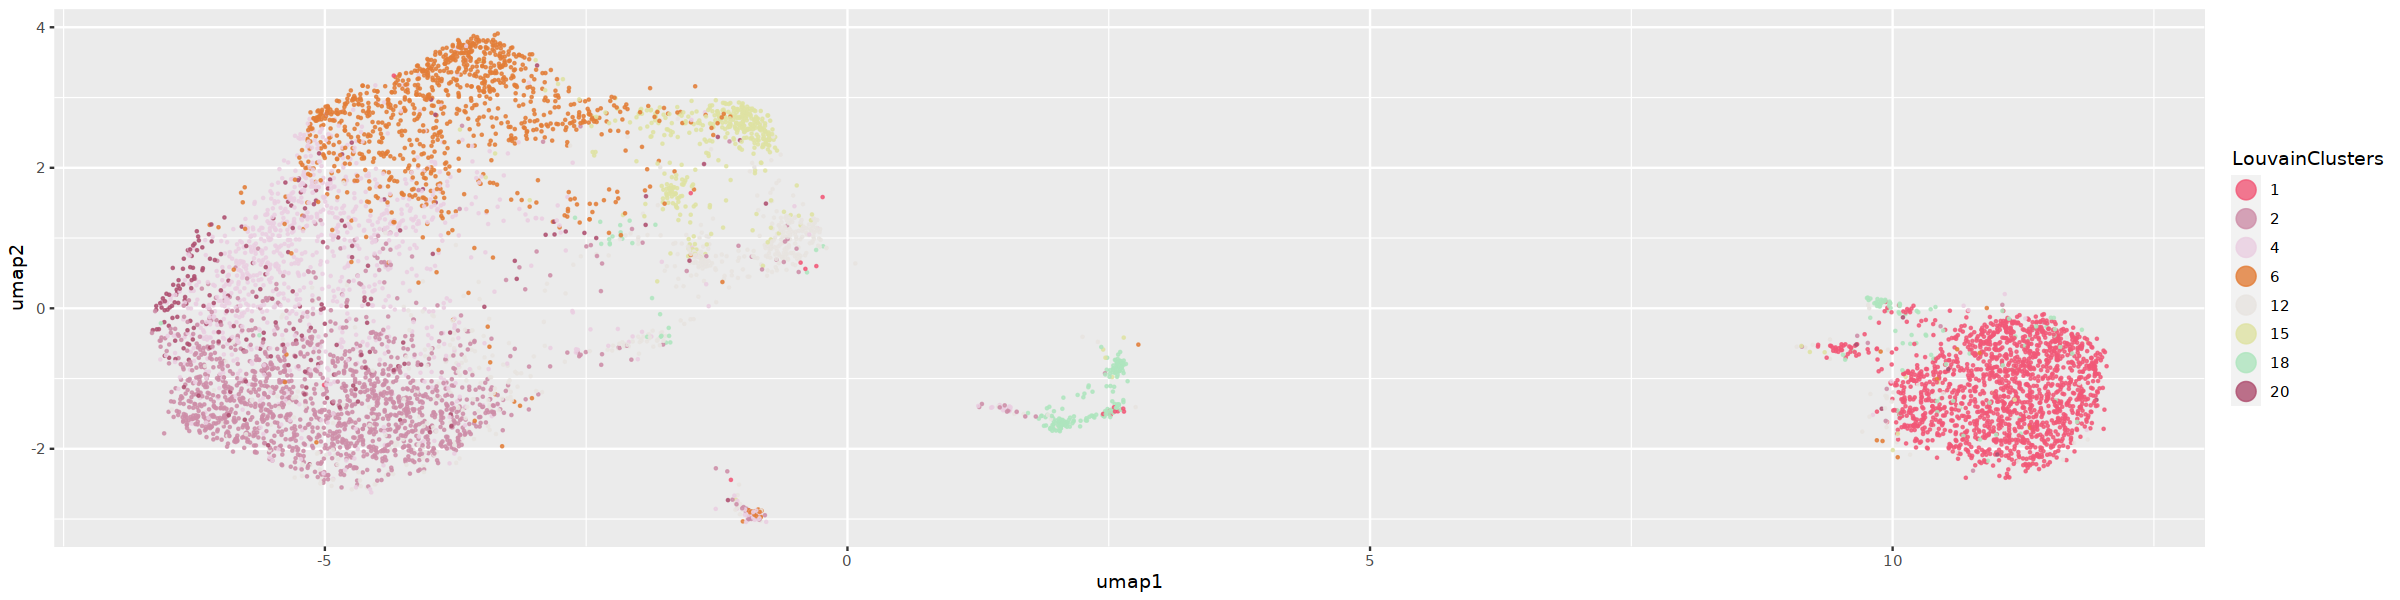

In [12]:
Zm.subcluster.matrix_counts <- generateMatrix(Zm.subcluster, 
                                              filtered=FALSE,
                                              peaks = FALSE,
                                              verbose=TRUE)

Zm.subcluster.sparse <- convertSparseData(Zm.subcluster.matrix_counts, verbose = TRUE)

# clean sparse counts matrix ---------------------------------------------
Zm.subcluster.matrix_counts.clean <- cleanData(Zm.subcluster.sparse, 
                     min.t=0.005,  # minimum feature frequency across cells
                     verbose=T)

# normalize with TFIDF ---------------------------------------------------
Zm.subcluster.tfidf <- tfidf(Zm.subcluster.matrix_counts.clean)

# project with NMF -------------------------------------------------------
Zm.subcluster.reduce_dim <- reduceDims(Zm.subcluster.tfidf,
                      method="SVD", 
                      n.pcs=30, 
                      num.var=NULL,
                      svd_slotName="SVD")

# reduce to 2-dimensions with UMAP ---------------------------------------
Zm.subcluster.tfidf <- projectUMAP(Zm.subcluster.reduce_dim, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(Zm.subcluster.tfidf$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [19]:
# identify clusters using neighborhood graph -----------------------------
tfidf.obj.dob.filt.clusters <- callClusters(Zm.subcluster.tfidf, 
                        res=2,
                        k.near = 30,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6570
Number of edges: 327264

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.6687
Number of communities: 17
Elapsed time: 8 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



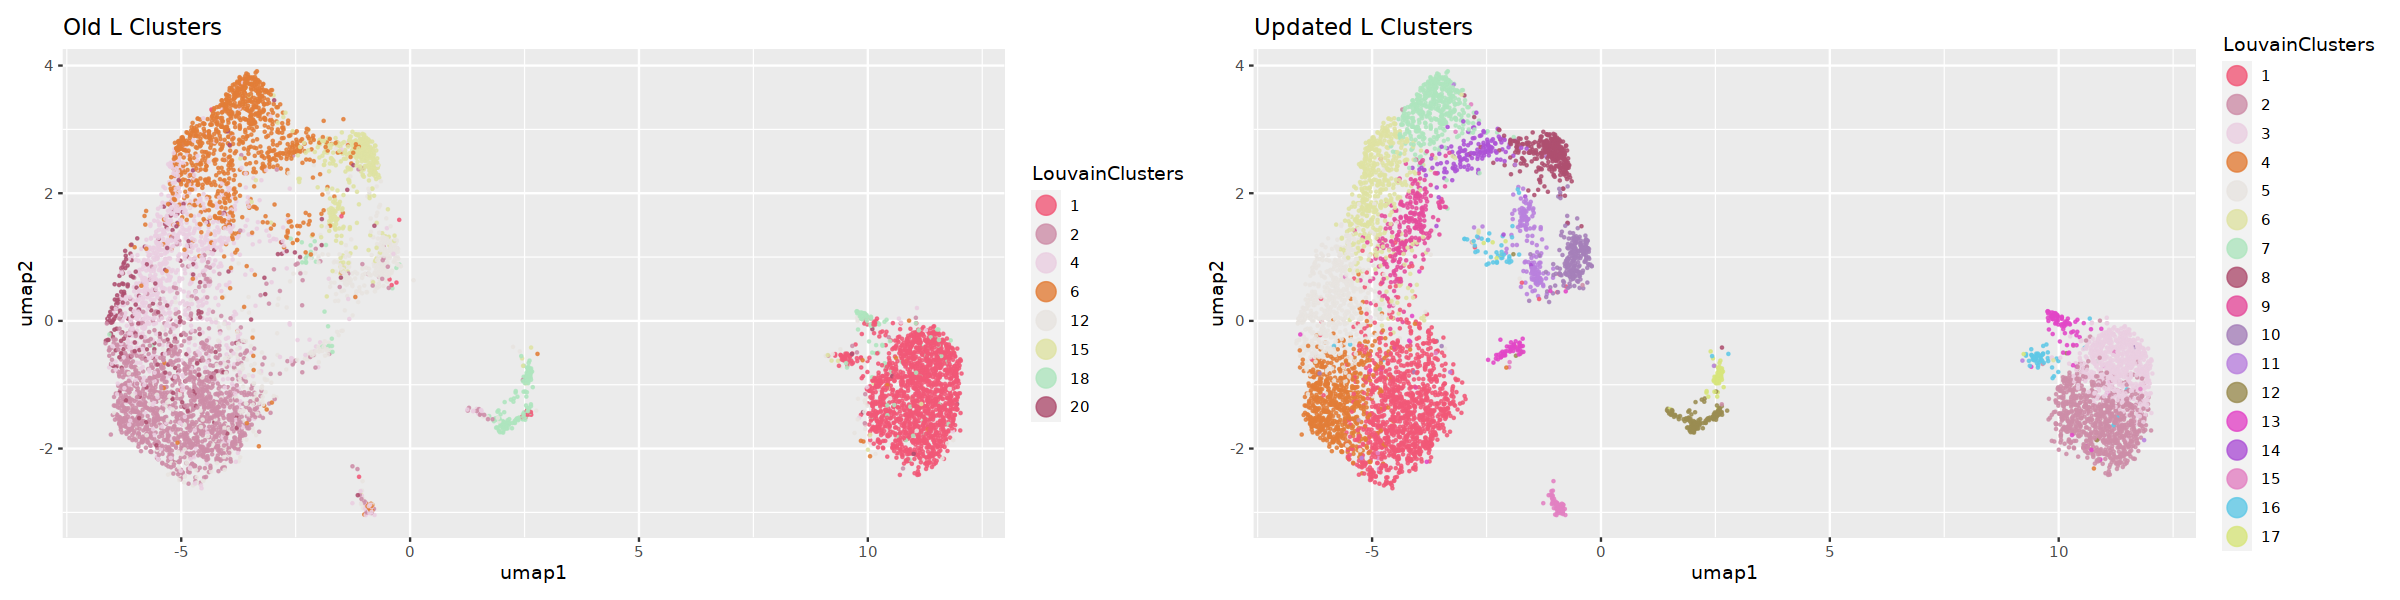

In [20]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(tfidf.obj.dob.filt.clusters$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(tfidf.obj.dob.filt.clusters$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [21]:

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
tfidf.obj.dob.filt.clusters.counts <- tfidf.obj.dob.filt.clusters
tfidf.obj.dob.filt.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/Zm.gene_counts.output"

In [22]:
## Execute Annotation Attempt #1

library(presto)
tfidf.obj.dob.filt.clusters.counts.final <- run_presto(tfidf.obj.dob.filt.clusters.counts,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

grabbed_top_marker_per_cluster <- top_markers(tfidf.obj.dob.filt.clusters.counts.final$presto_marker, 200)


Loading required package: data.table


Attaching package: 'data.table'


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:reshape2':

    dcast, melt




# A tibble: 6 × 14
  cellID       total   tss  acrs  ptmt nSites log10nSites sampleID  umap1  umap2
  <chr>        <dbl> <dbl> <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl>  <dbl>
1 BC:Z:GTGGCC… 79068 27529 40483    NA  35872        4.55 rep1      9.66  -0.512
2 BC:Z:GTGAAA… 47683 15045 24942    NA  23089        4.36 rep1     -0.561  1.14 
3 BC:Z:GTGGCC… 43371 21084 35438    NA  18127        4.26 rep1     -1.69   1.65 
4 BC:Z:GTCCGC… 39209 17750 29628    NA  17442        4.24 rep1     -1.31   2.63 
5 BC:Z:GTGAAA… 38829 18370 28469    NA  17006        4.23 rep1     -1.73   1.77 
6 BC:Z:GTGAAA… 36993 11147 16424    NA  18860        4.28 rep1     -3.65   1.41 
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name       barcode                                          accessability
  <chr>           <chr>                                                    <dbl>
1 Zm00001eb024370 BC:Z:AGTCAACTTGTAAGC

In [23]:
represented_marker_lst <- list()
for (i in unique(tfidf.obj.dob.filt.clusters.counts.final$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_maize, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


$`16`
# A tibble: 5 × 8
   rank geneID          chr       start       end name  type              tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr> <chr>             <chr> 
1     3 Zm00001eb041120 chr1  216343268 216349212 ccr1  vascular_scleren… axill…
2    18 Zm00001eb033390 chr1  185941269 185953288 dct2  bundle_sheath     axill…
3    25 Zm00001eb121470 chr3    7184482   7190135 me3   bundle_sheath     axill…
4   187 Zm00001eb197410 chr4  196177320 196178190 ssu1  bundle_sheath     axill…
5   191 Zm00001eb158810 chr3  220987633 220994980 cah1  mesophyll         axill…

$`10`
# A tibble: 3 × 8
   rank geneID          chr       start       end name   type             tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>  <chr>            <chr> 
1    35 Zm00001eb359190 chr8  150377960 150388567 cah6   mesophyll        axill…
2    41 Zm00001eb050660 chr1  257907538 257913218 phb    xylem_parenchym… axill…
3   105 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1 metaphloem_siev… axill…

$`11`
# A tibble: 6 × 8
   rank geneID          chr       start       end name            type    tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>           <chr>   <chr> 
1     5 Zm00001eb084940 chr2   66223855  66236990 ba2             axilla… axill…
2    28 Zm00001eb041120 chr1  216343268 216349212 ccr1            vascul… axill…
3    44 Zm00001eb393080 chr9  128931828 128934057 bk1_v4v5count_2 vascul… axill…
4    45 Zm00001eb393070 chr9  128931645 128933956 bk1_v4v5count_1 vascul… axill…
5    74 Zm00001eb230300 chr5   72870500  72874432 rop9            subsid… axill…
6   109 Zm00001eb223190 chr5   36008903  36017433 ZmNEN1          metaph… axill…

$`8`
# A tibble: 2 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     1 Zm00001eb084940 chr2   66223855  66236990 ba2              axill… axill…
2   113 Zm00001eb133930 chr3  105501727 105507931 sut2_v4v5count_2 compa… axill…

$`5`
# A tibble: 5 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1    10 Zm00001eb313510 chr7  123684235 123693464 gl1              epide… axill…
2    42 Zm00001eb336530 chr8   17391163  17395311 vt2              epide… axill…
3    97 Zm00001eb319090 chr7  147881484 147888019 ocl3             L1_le… axill…
4   171 Zm00001eb344960 chr8   77541178  77544363 fama_v4v5count_2 guard… axill…
5   175 Zm00001eb171720 chr4   30910426  30916600 ocl5             proto… axill…

$`14`
# A tibble: 6 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1    51 Zm00001eb084940 chr2   66223855  66236990 ba2              axill… axill…
2    63 Zm00001eb336530 chr8   17391163  17395311 vt2              epide… axill…
3   114 Zm00001eb303810 chr7   22872338  22883538 SID1_v4v5count_1 spike… axill…
4   121 Zm00001eb313510 chr7  123684235 123693464 gl1              epide… axill…
5   157 Zm00001eb415530 chr10  77872649  77881801 REL2             inflo… axill…
6   187 Zm00001eb328280 chr7  176663838 176665966 fdl              proto… axill…

$`6`
# A tibble: 6 × 8
   rank geneID          chr       start       end name             type   tissue
  <int> <chr>           <chr>     <dbl>     <dbl> <chr>            <chr>  <chr> 
1     3 Zm00001eb313510 chr7  123684235 123693464 gl1              epide… axill…
2    31 Zm00001eb084940 chr2   66223855  66236990 ba2              axill… axill…
3    43 Zm00001eb429330 chr10 141187279 141196584 ZmGL3            trich… axill…
4   141 Zm00001eb344950 chr8   77536955  77542082 fama_v4v5count_1 guard… axill…
5   161 Zm00001eb344960 chr8   77541178  77544363 fama_v4v5count_2 guard… axill…
6   200 Zm00001eb233720 chr5   91220184  91225235 bm5              vascu… axill…

$`3`
# A tibble: 4 × 

In [24]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Zm_leaf.merged_replicates.Subclustering_epidermal_bin_clustering.LouvainCluster_annot_V3.presto.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster rank geneID          chr   start     end      
1  1               20  Zm00001eb313510 chr7  123684235 123693464
2  1               70  Zm00001eb171720 chr4   30910426  30916600
3  1               92  Zm00001eb429330 chr10 141187279 141196584
4  10              35  Zm00001eb359190 chr8  150377960 150388567
5  10              41  Zm00001eb050660 chr1  257907538 257913218
6  10             105  Zm00001eb223190 chr5   36008903  36017433
7  11               5  Zm00001eb084940 chr2   66223855  66236990
8  11              28  Zm00001eb041120 chr1  216343268 216349212
9  11              44  Zm00001eb393080 chr9  128931828 128934057
10 11              45  Zm00001eb393070 chr9  128931645 128933956
11 11              74  Zm00001eb230300 chr5   72870500  72874432
12 11             109  Zm00001eb223190 chr5   36008903  36017433
13 12              80  Zm00001eb180060 chr4   89738845  89744037
14 13              44  Zm00001eb158810 chr3  220987633 220994980
15 13              60  Zm00001eb041120 chr1  216343268 216349212
16 14              51  Zm00001eb084940 chr2   66223855  66236990
17 14              63  Zm00001eb336530 chr8   17391163  17395311
18 14             114  Zm00001eb303810 chr7   22872338  22883538
19 14             121  Zm00001eb313510 chr7  123684235 123693464
20 14             157  Zm00001eb415530 chr10  77872649  77881801
21 14             187  Zm00001eb328280 chr7  176663838 176665966
22 15               1  Zm00001eb158420 chr3  219956816 219962712
23 15              11  Zm00001eb288410 chr6  159025680 159028453
24 15              90  Zm00001eb117620 chr2  241208198 241210052
25 15             128  Zm00001eb117610 chr2  241207648 241215680
26 15             164  Zm00001eb303810 chr7   22872338  22883538
27 16               3  Zm00001eb041120 chr1  216343268 216349212
28 16              18  Zm00001eb033390 chr1  185941269 185953288
29 16              25  Zm00001eb121470 chr3    7184482   7190135
30 16             187  Zm00001eb197410 chr4  196177320 196178190
⋮  ⋮              ⋮    ⋮               ⋮     ⋮         ⋮        
32 17             115  Zm00001eb197410 chr4  196177320 196178190
33 2                7  Zm00001eb158810 chr3  220987633 220994980
34 2                8  Zm00001eb383680 chr9   70927063  70932470
35 2              136  Zm00001eb296990 chr6  178052132 178057800
36 3                3  Zm00001eb158810 chr3  220987633 220994980
37 3                5  Zm00001eb383680 chr9   70927063  70932470
38 3              134  Zm00001eb296990 chr6  178052132 178057800
39 3              143  Zm00001eb359190 chr8  150377960 150388567
40 4              184  Zm00001eb041120 chr1  216343268 216349212
41 4              198  Zm00001eb313510 chr7  123684235 123693464
42 5               10  Zm00001eb313510 chr7  123684235 123693464
43 5               42  Zm00001eb336530 chr8   17391163  17395311
44 5               97  Zm00001eb319090 chr7  147881484 147888019
45 5              171  Zm00001eb344960 chr8   77541178  77544363
46 5              175  Zm00001eb171720 chr4   30910426  30916600
47 6                3  Zm00001eb313510 chr7  123684235 123693464
48 6               31  Zm00001eb084940 chr2   66223855  66236990
49 6               43  Zm00001eb429330 chr10 141187279 141196584
50 6              141  Zm00001eb344950 chr8   77536955  77542082
51 6              161  Zm00001eb344960 chr8   77541178  77544363
52 6              200  Zm00001eb233720 chr5   91220184  91225235
53 7                3  Zm00001eb313510 chr7  123684235 123693464
54 7              121  Zm00001eb378150 chr9   25170886  25178773
55 8                1  Zm00001eb084940 chr2   66223855  66236990
56 8              113  Zm00001eb133930 chr3  105501727 105507931
57 9               18  Zm00001eb313510 chr7  123684235 123693464
58 9               25  Zm00001eb084940 chr2   66223855  66236990
59 9              134  Zm00001eb050660 chr1  257907538 257913218
60 9              151  Zm00001eb336530 chr8   17391163  17395311
61 9              178  Zm00001eb344950

In [25]:

prefix <- "Zm_leaf.merged_replicates.Subclustering_epidermal_bin_clustering"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/clustering/"
paste0(data_path, prefix,".merged_clusters.sparse")
# output text files
nmf.meta <- tfidf.obj.dob.filt.clusters.counts.final$sub_cluster
nmf.rd <- tfidf.obj.dob.filt.clusters.counts.final$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(tfidf.obj.dob.filt.clusters.counts.final$counts))
trip$i <- rownames(tfidf.obj.dob.filt.clusters.counts.final$counts)[trip$i]
trip$j <- colnames(tfidf.obj.dob.filt.clusters.counts.final$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")



[1] "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/Zm_leaf.merged_replicates.Subclustering_epidermal_bin_clustering.merged_clusters.sparse"